In [2]:
import pandas as pd
import os
import glob
from lightjob.cli import load_db
from collections import defaultdict
from lightjob.db import SUCCESS
from IPython.display import Image, display
db = load_db()

In [67]:
stat = defaultdict(list)
for j in db.jobs_with(state=SUCCESS, type='generation'):
    if j['stats'] is None:
        continue
    #if 'fontness' not in j['stats']:
    #    continue
    if 'aa_fontness' not in j['stats']:
        continue
    #if 'fonts_rec_error' not in j['stats']:
    #    continue
    img = '../jobs/results/{}/final1000.png'.format(j['summary'])
    if not os.path.exists(img):
        continue
    #stat['fontness'].append(j['stats']['fontness']['mean'])
    stat['fontness'].append(j['stats']['aa_fontness']['mean'])
    #stat['fontness'].append(j['stats']['fonts_rec_error'])
    stat['image'].append(img)

In [68]:
print(len(stat['image']))

1511


In [61]:
df = pd.DataFrame(stat)
df = df.sort_values(by='fontness', ascending=True)
df.head()

,fontness,image
538,1.421431e-08,../jobs/results/772c35ff5d58b308b346d3875cd9e6...
301,1.421431e-08,../jobs/results/ead7ec0844914db52958b031e19813...
474,1.421431e-08,../jobs/results/f54679a73ff4e050b278e5442eb022...
663,1.421431e-08,../jobs/results/66c3dc4e0f2a13aa540ae9bba90529...
102,1.421431e-08,../jobs/results/3e56e126a1abe124756d85dcd4bb73...


1.42143103243e-08


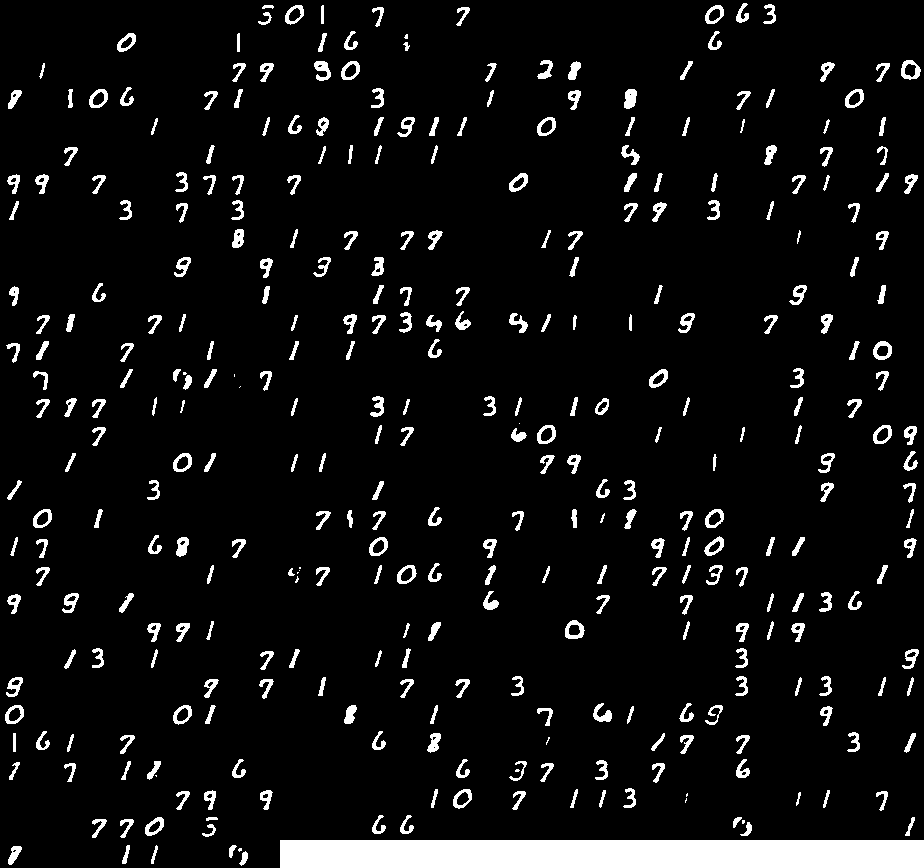

1.42143103243e-08


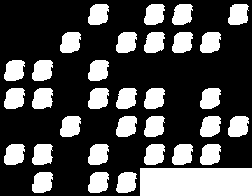

1.42143103243e-08


1.42143103243e-08


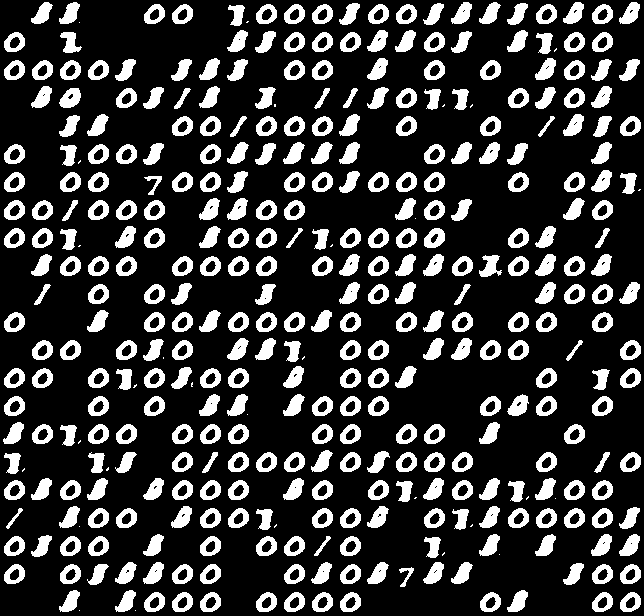

1.42143103243e-08


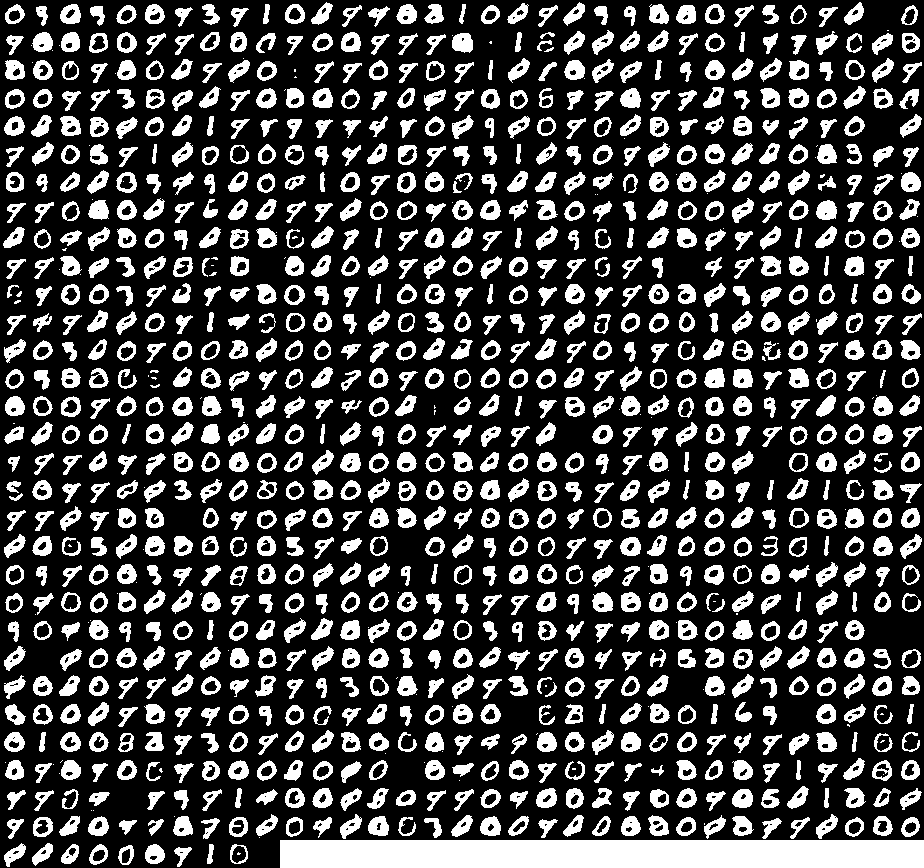

1.42143103243e-08


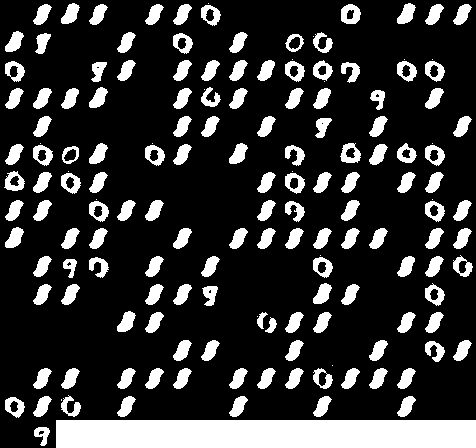

1.42143103243e-08


1.42143103243e-08


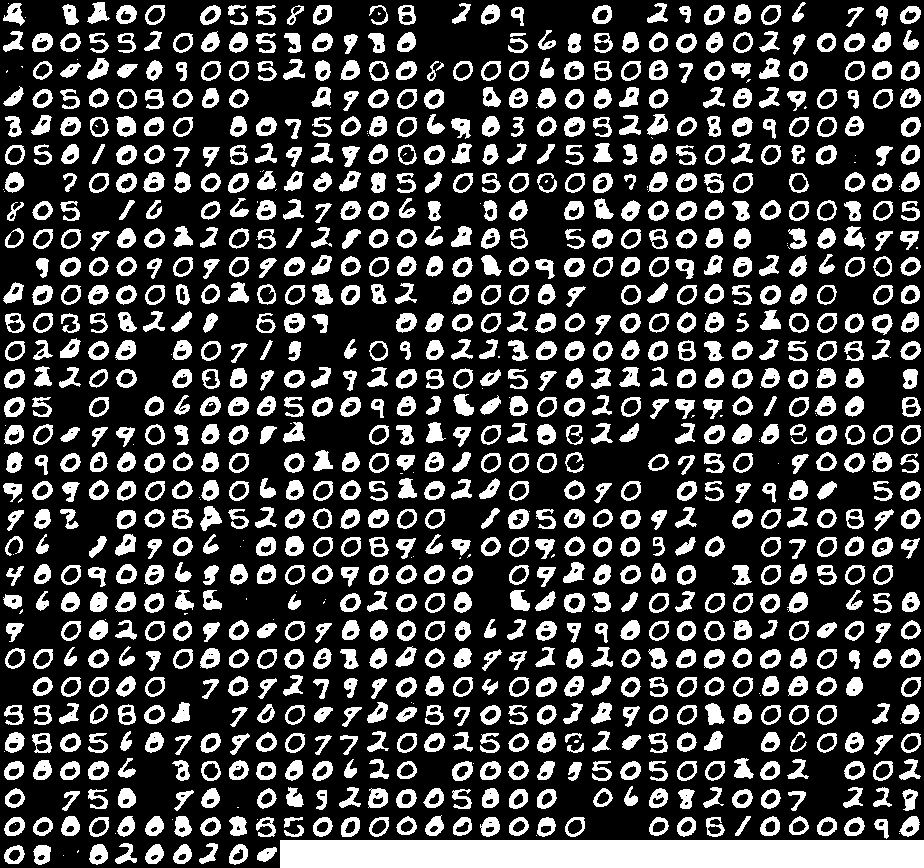

1.42143103243e-08


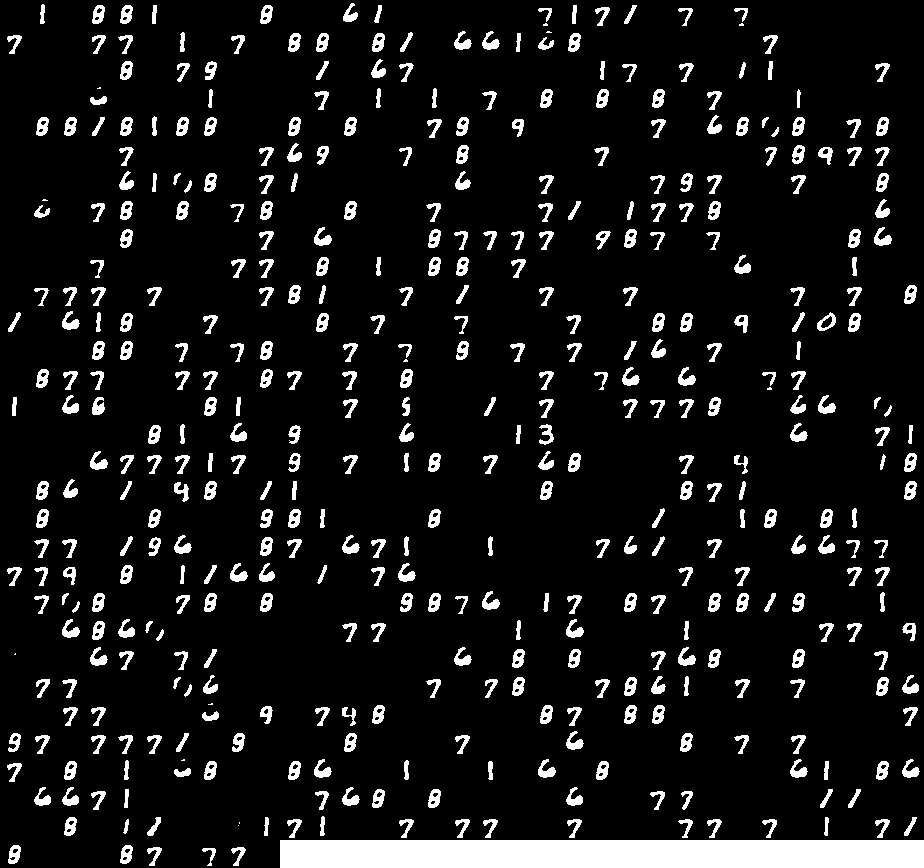

1.42143103243e-08


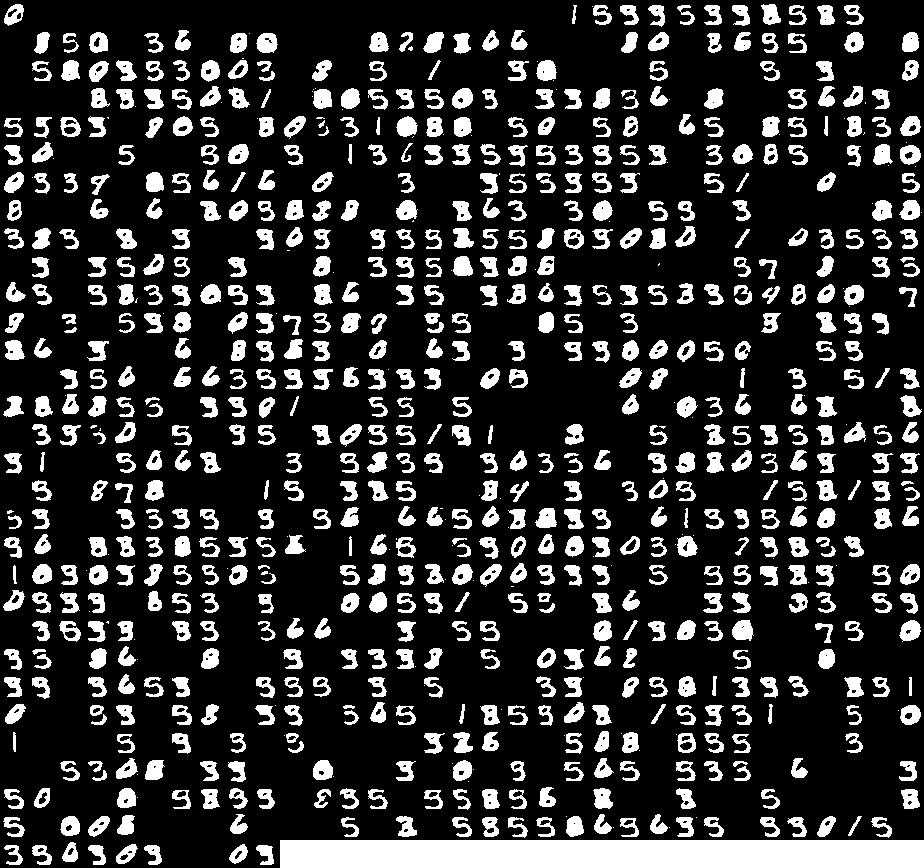

1.42143103243e-08


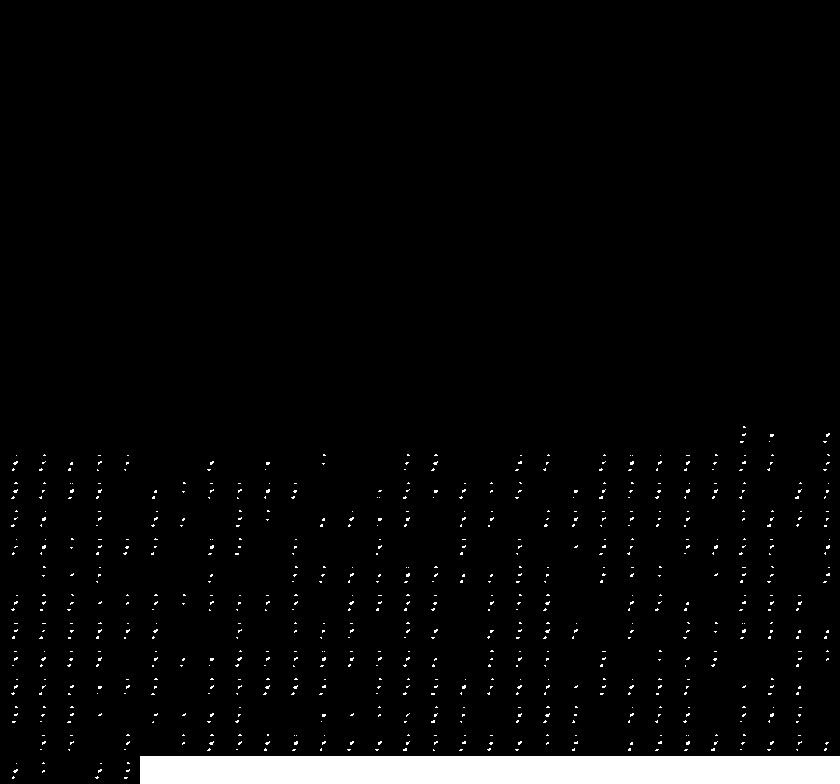

1.42143103243e-08


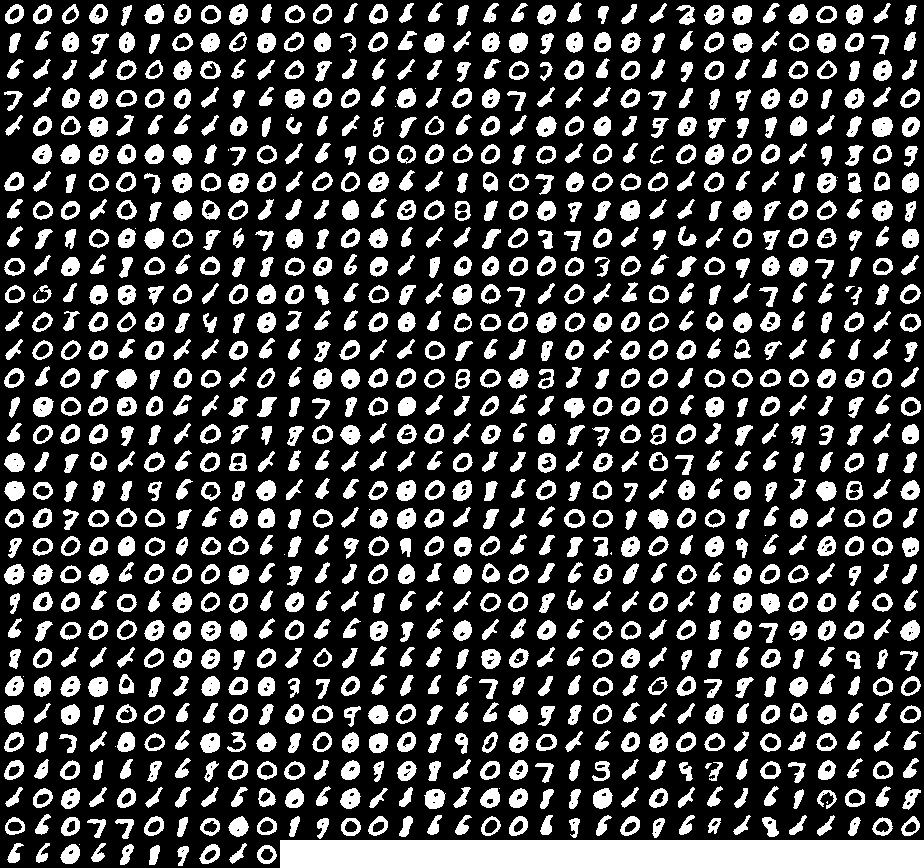

1.42143103243e-08


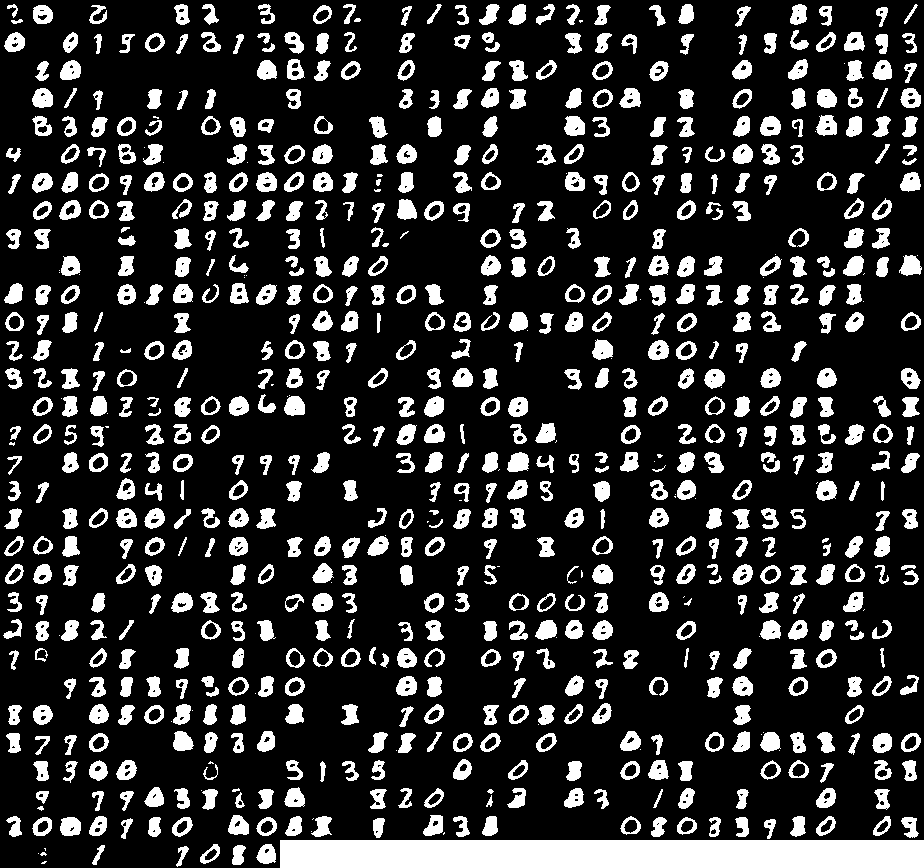

1.42143103243e-08


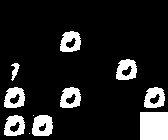

1.42143103243e-08


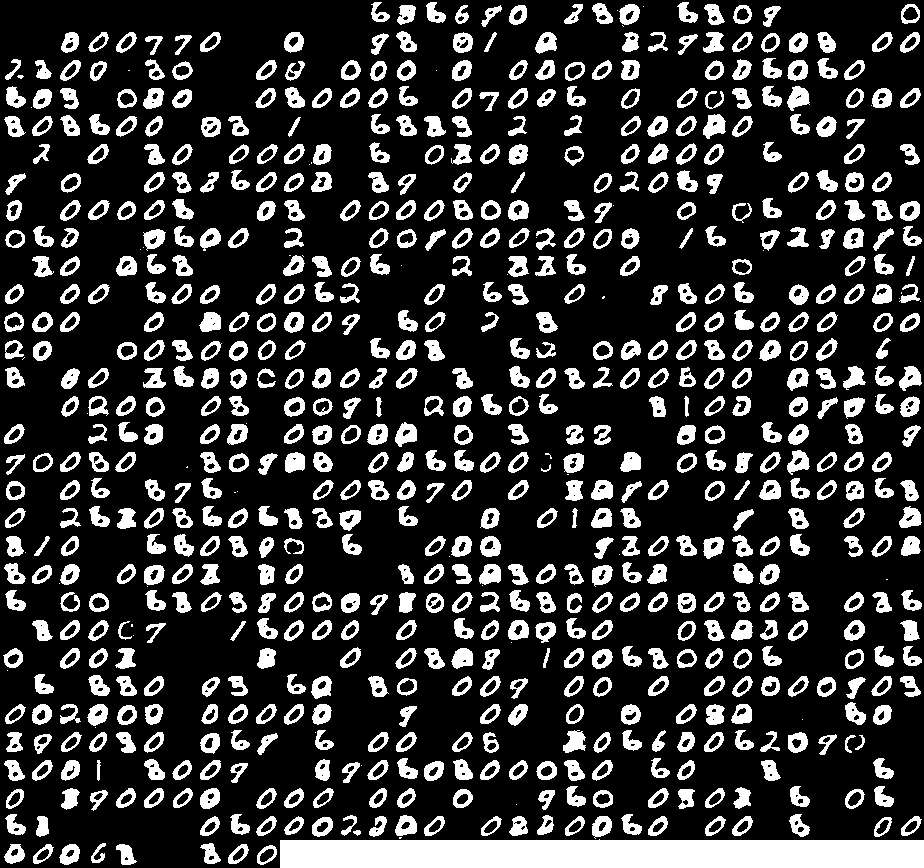

1.42143103243e-08


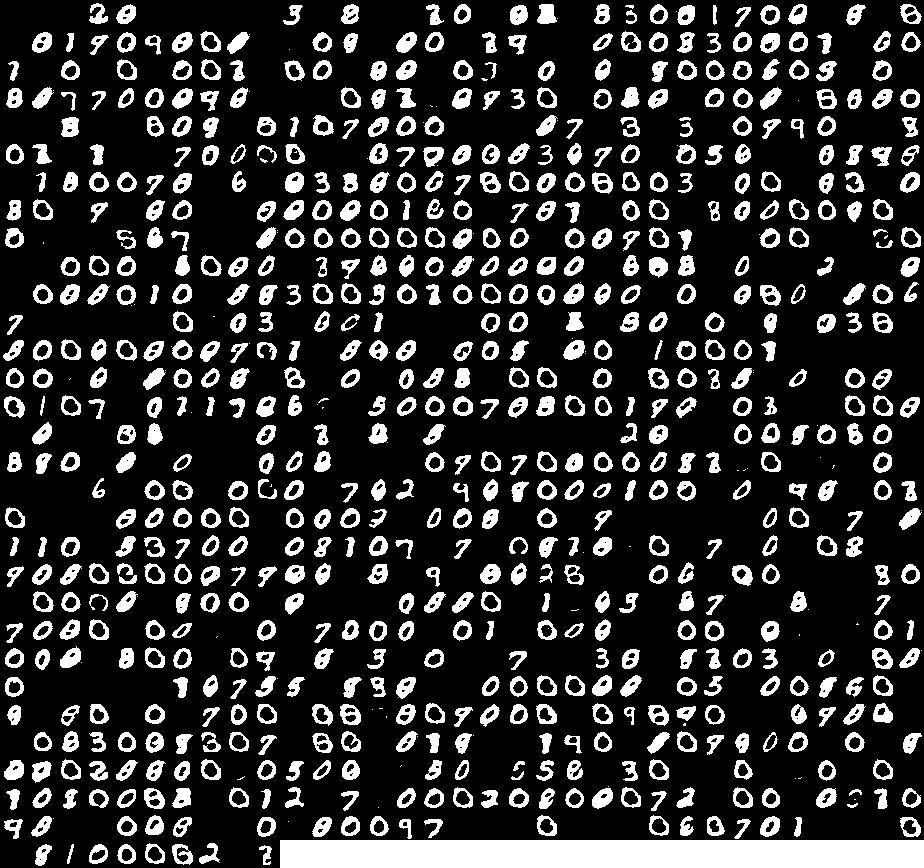

1.42143103243e-08


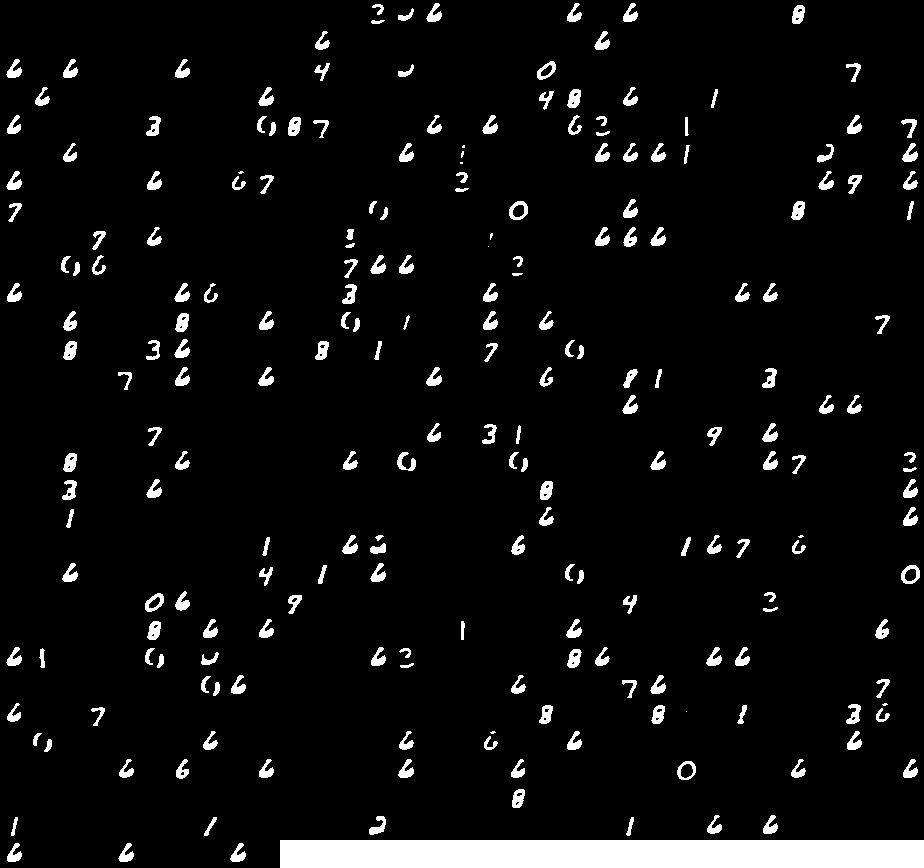

1.42143103243e-08


1.42143103243e-08


1.42143103243e-08


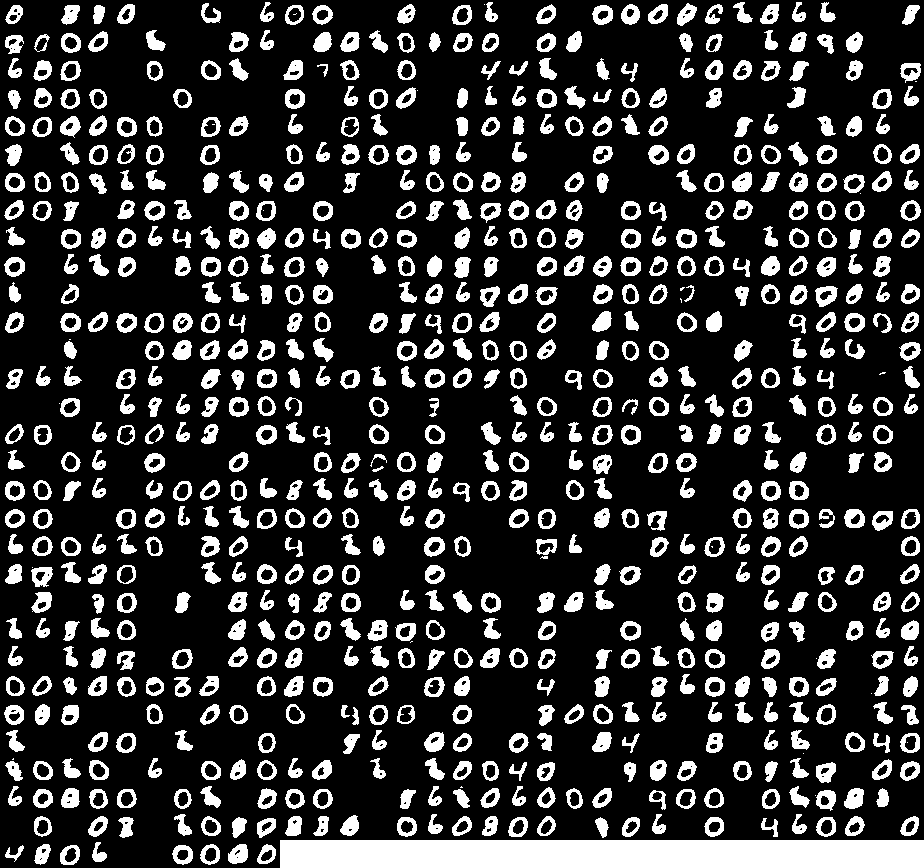

1.42143103243e-08


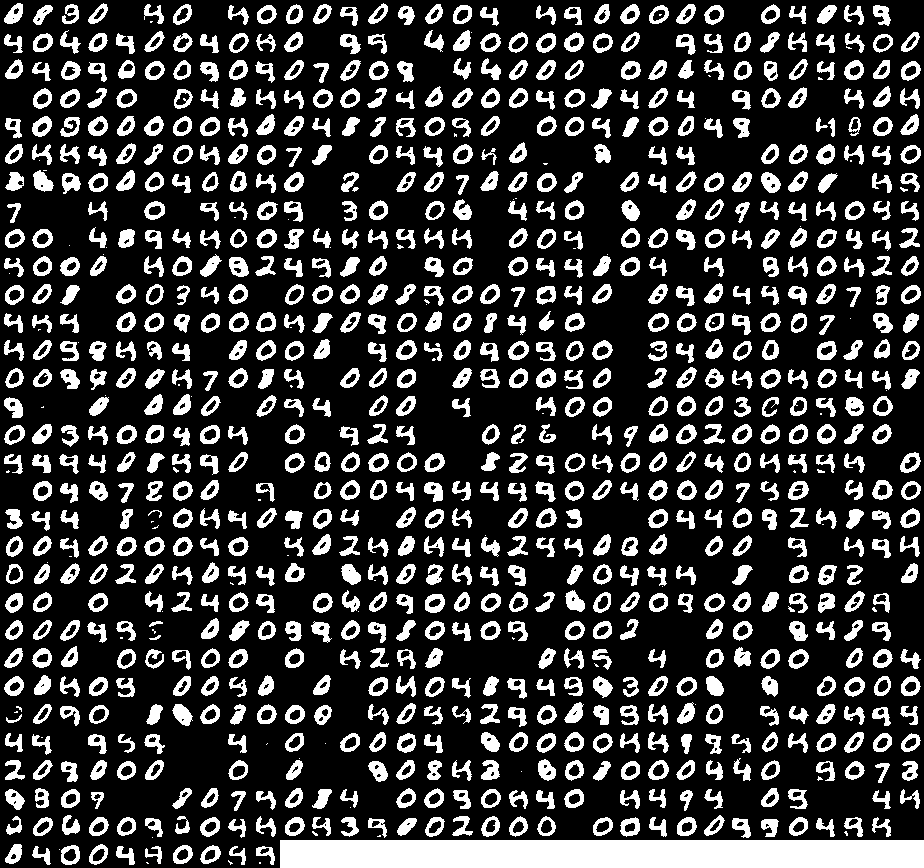

1.42143103243e-08


1.42143103243e-08


1.42143103243e-08


1.42143103243e-08


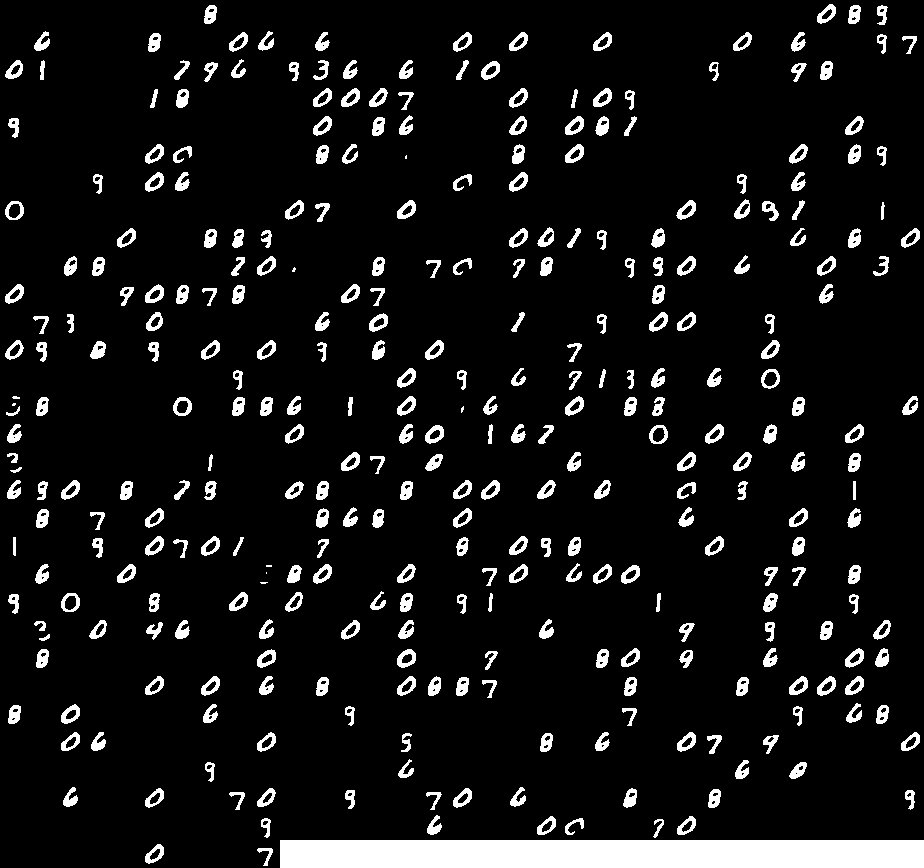

1.42143103243e-08


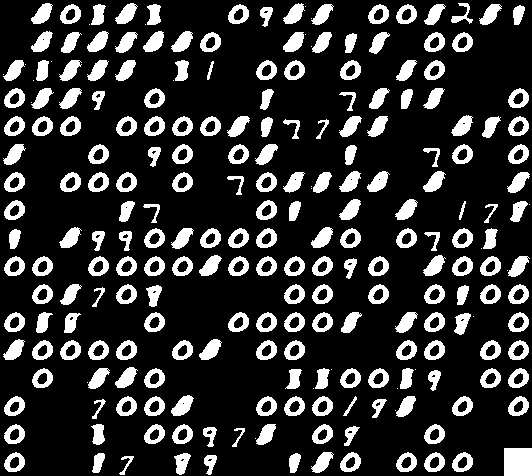

1.42143103243e-08


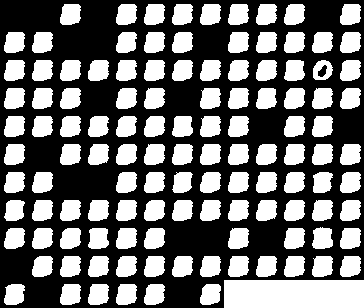

1.42143103243e-08


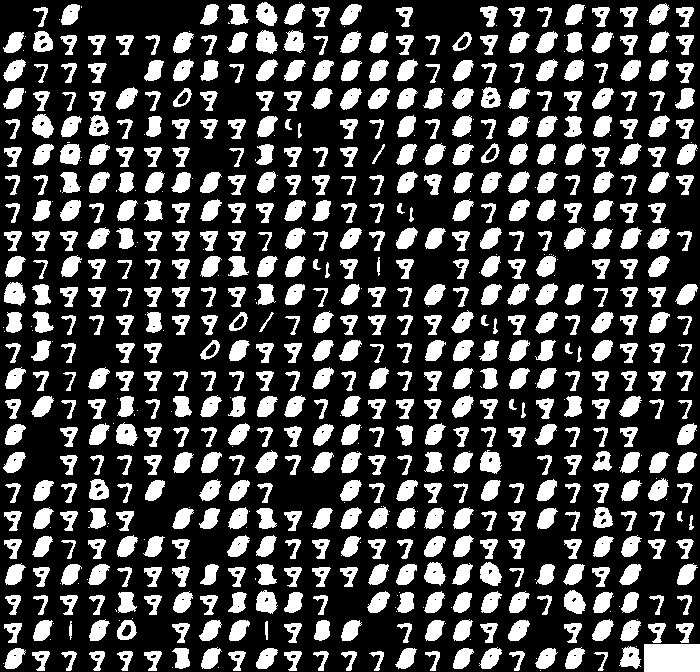

1.42143103243e-08


1.42143103243e-08


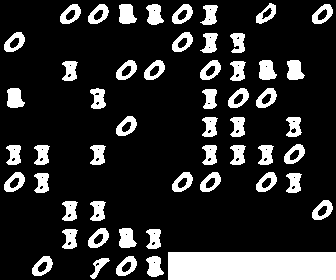

1.42143103243e-08


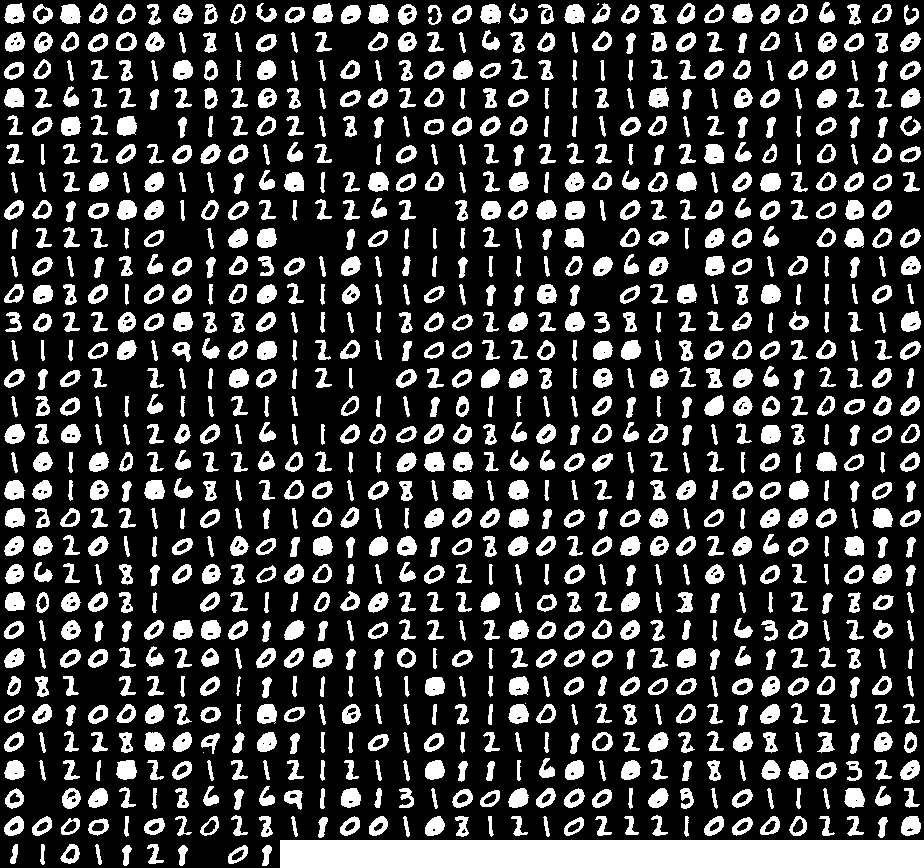

1.42143103243e-08


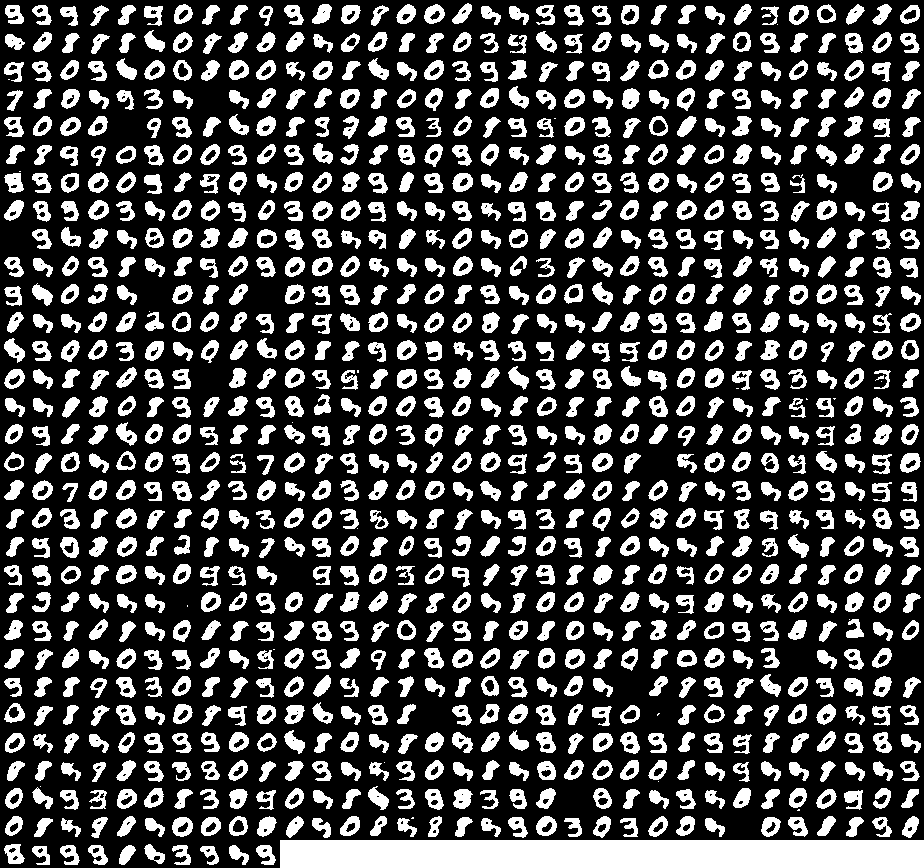

1.42143103243e-08


1.42143103243e-08


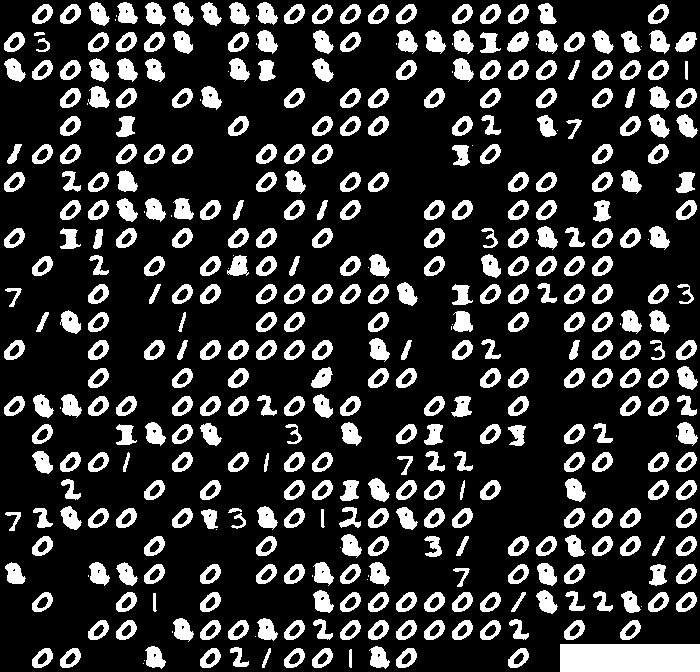

1.42143103243e-08


1.42143103243e-08


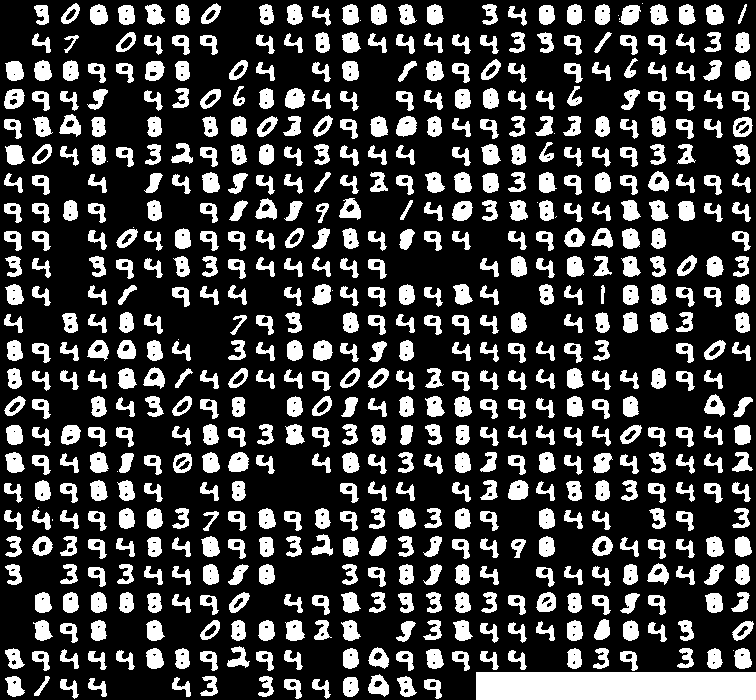

1.42143103243e-08


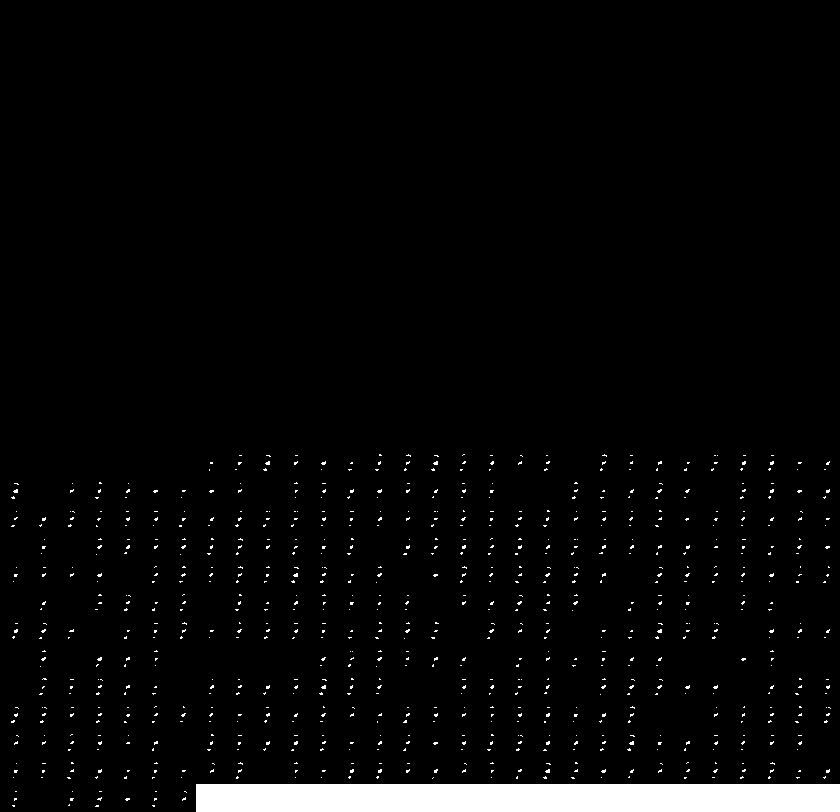

1.42143103243e-08


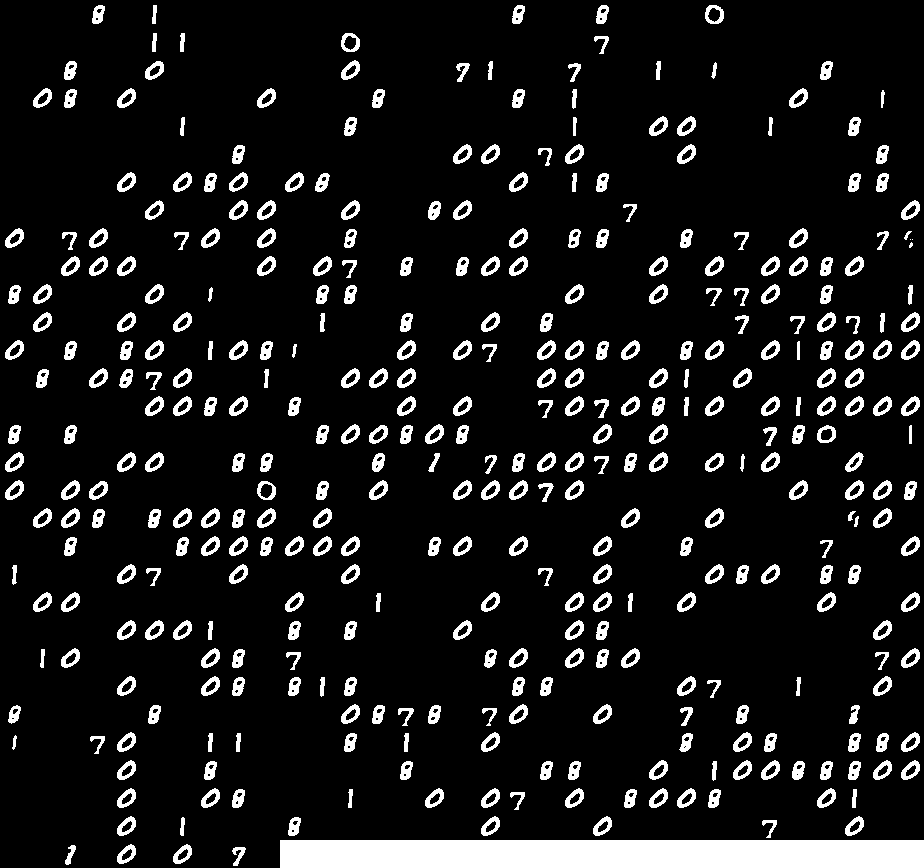

1.42143103243e-08


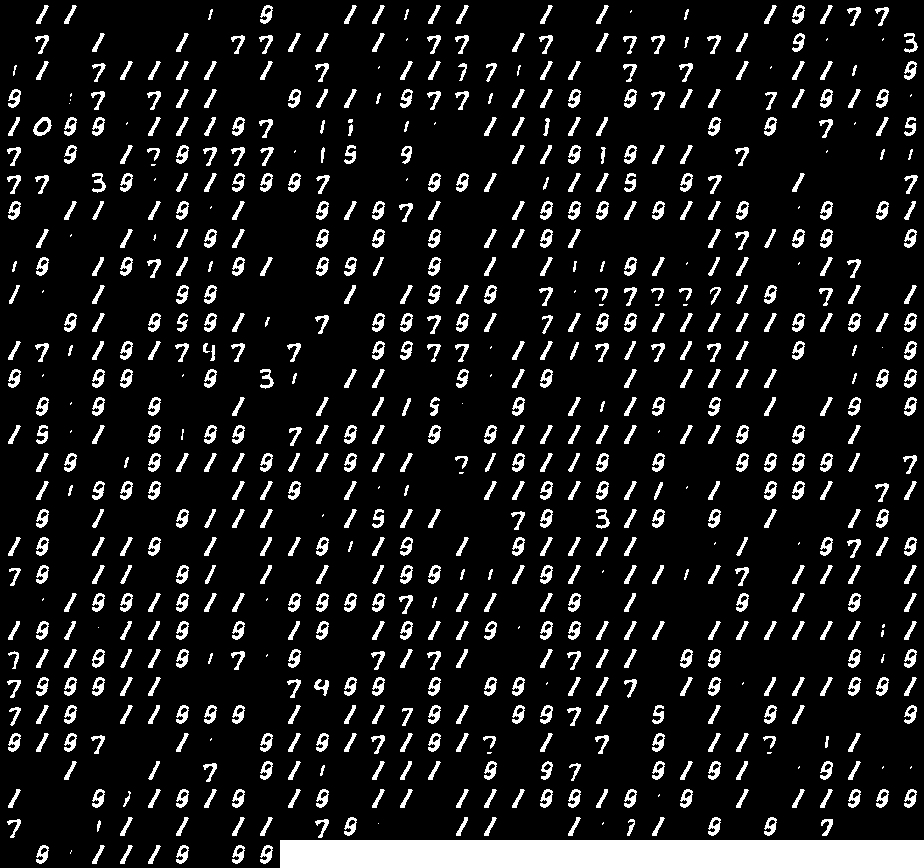

1.42143103243e-08


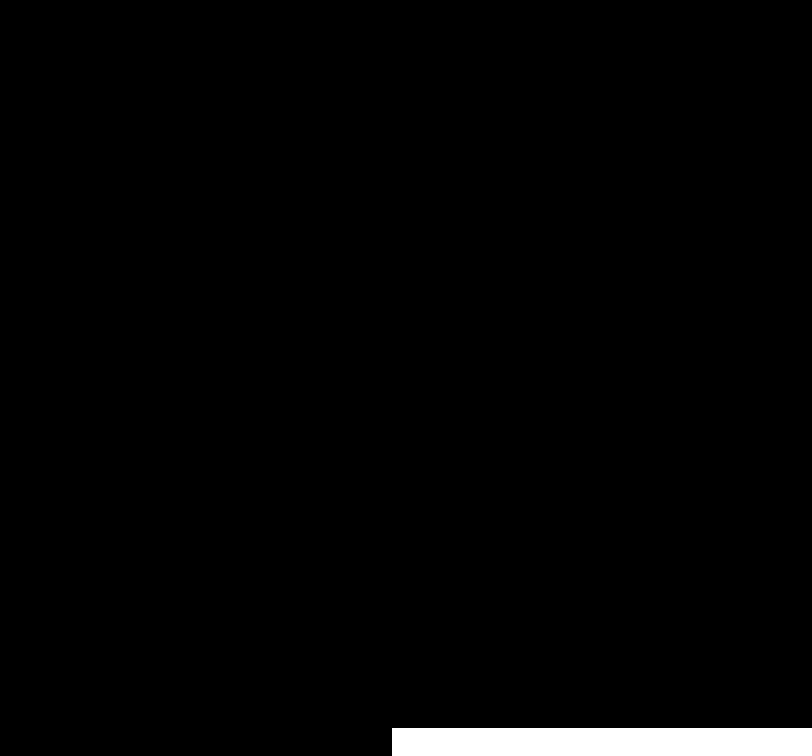

1.42143103243e-08


1.42143103243e-08


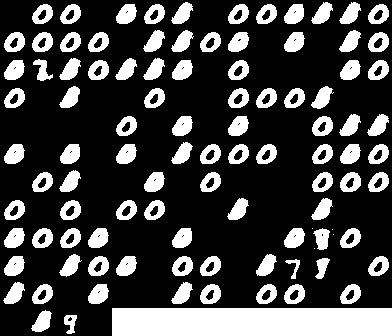

1.42143103243e-08


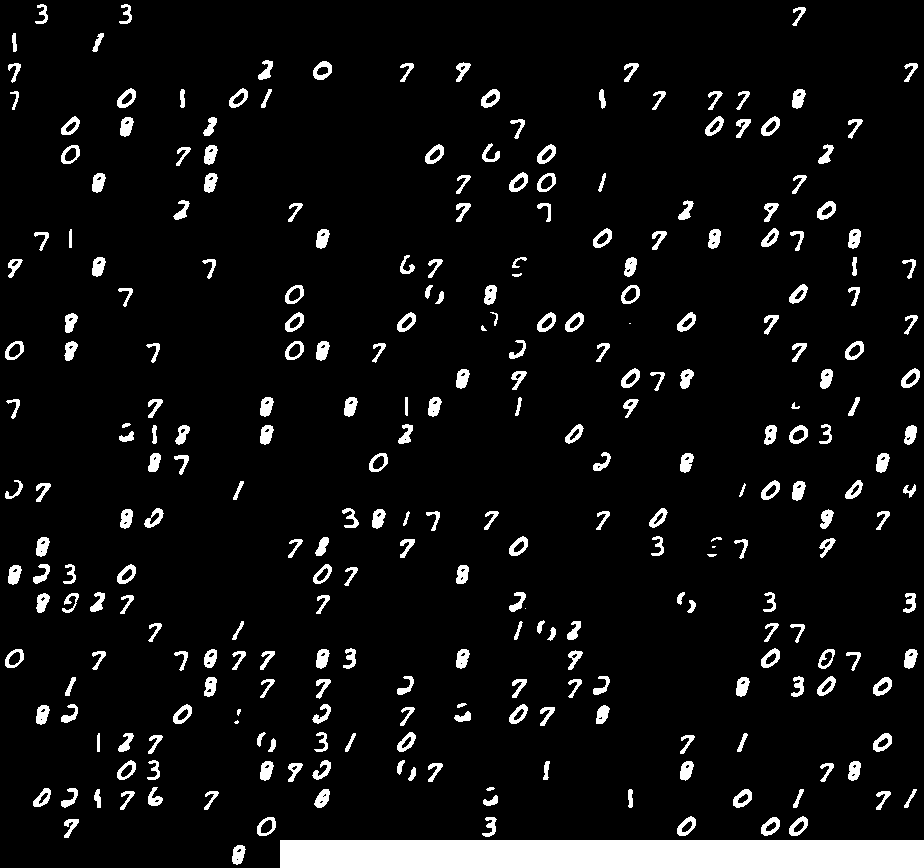

1.42143103243e-08


1.42143103243e-08


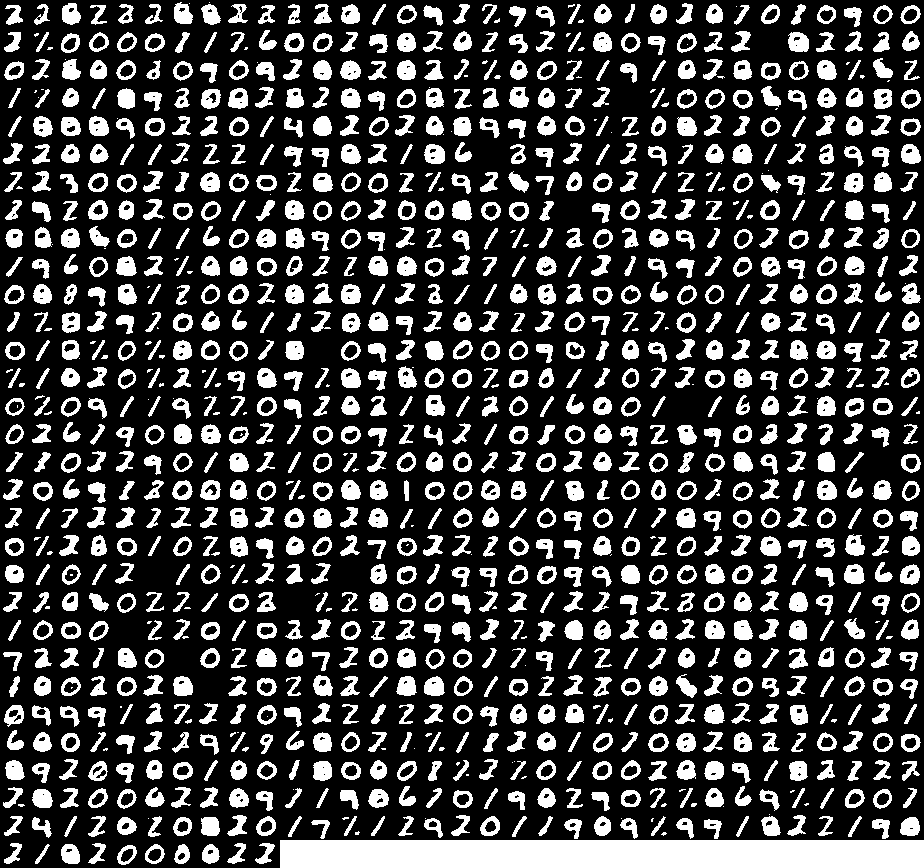

1.42143103243e-08


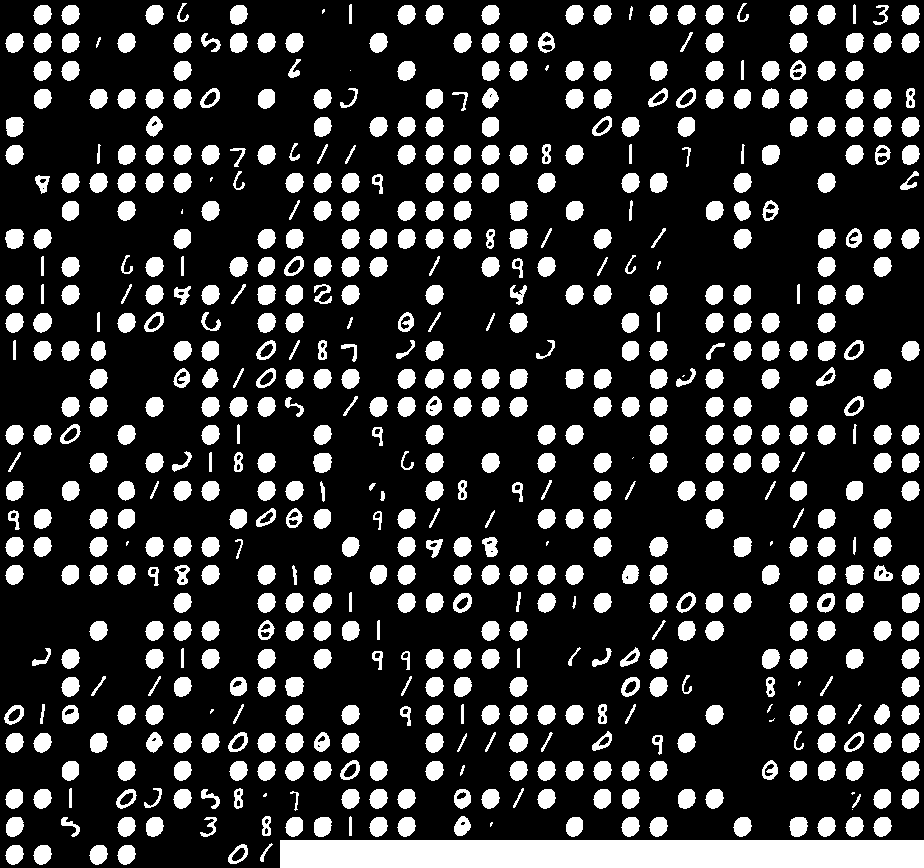

1.42143103243e-08


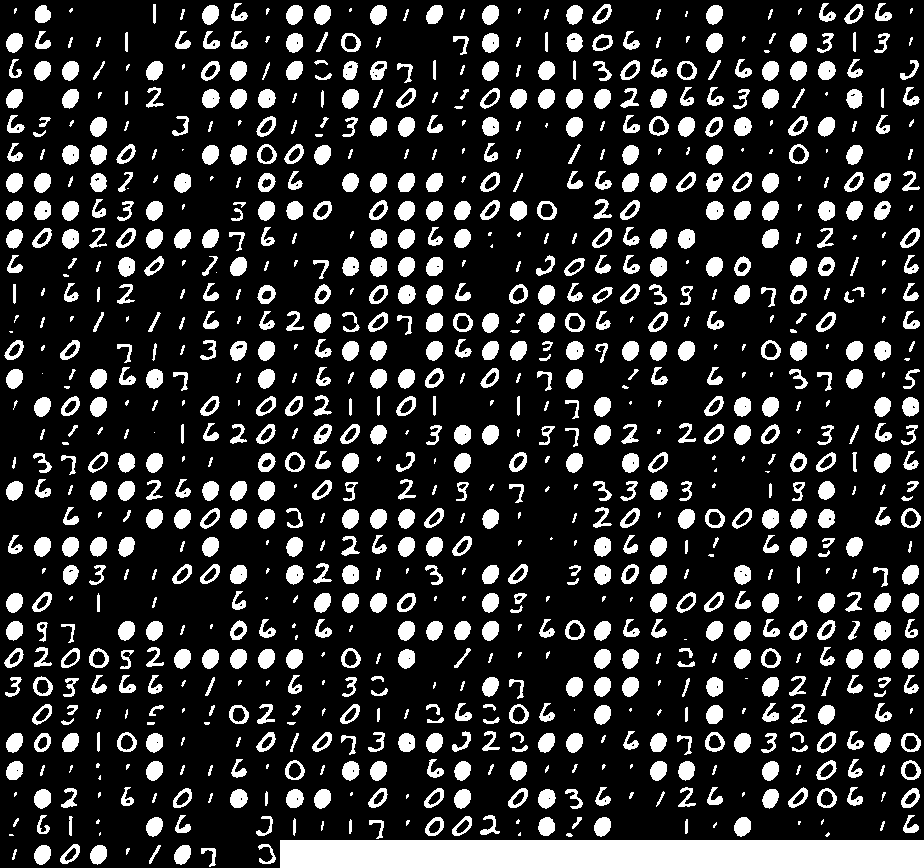

1.42143103243e-08


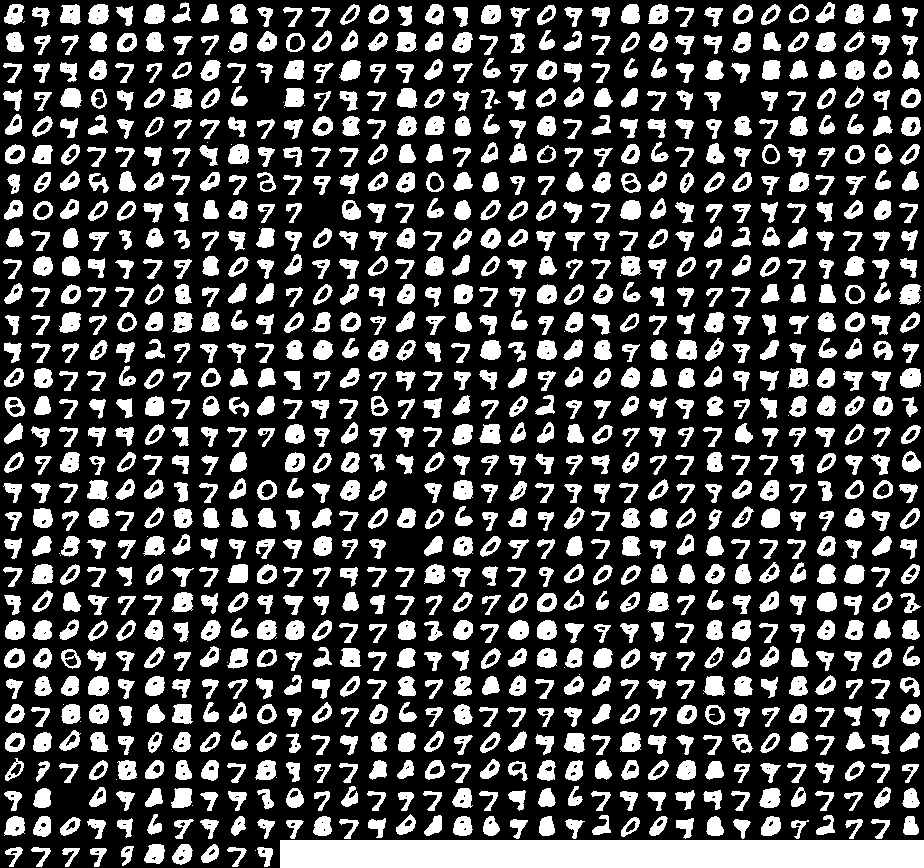

1.42143103243e-08


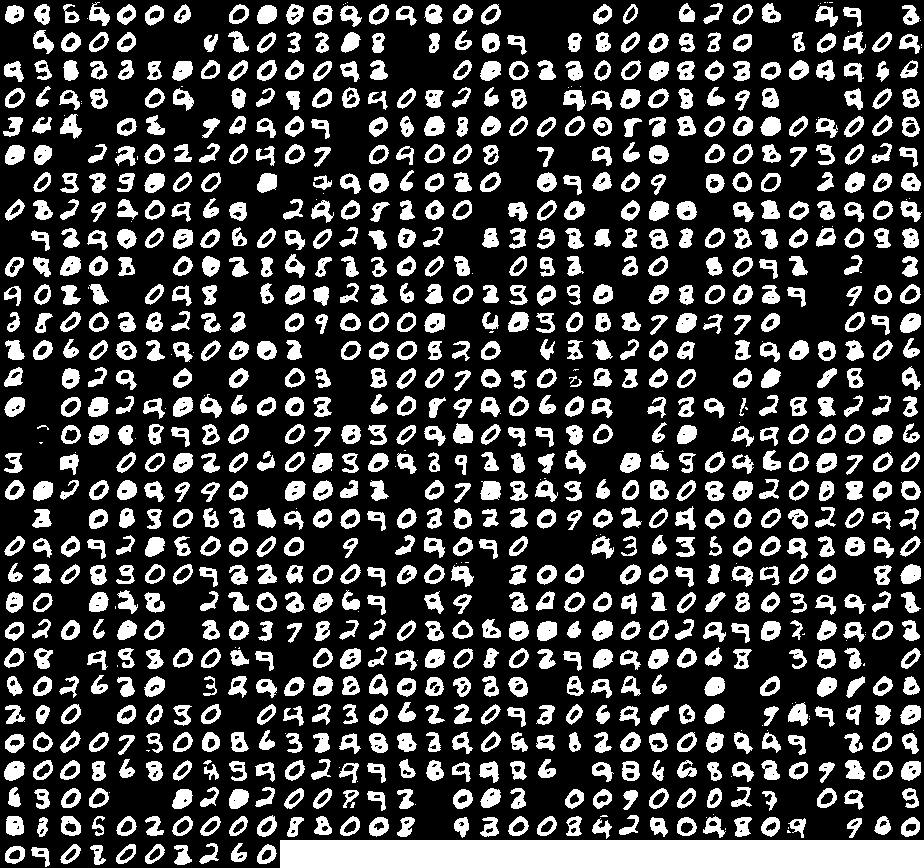

1.42143103243e-08


1.42143103243e-08


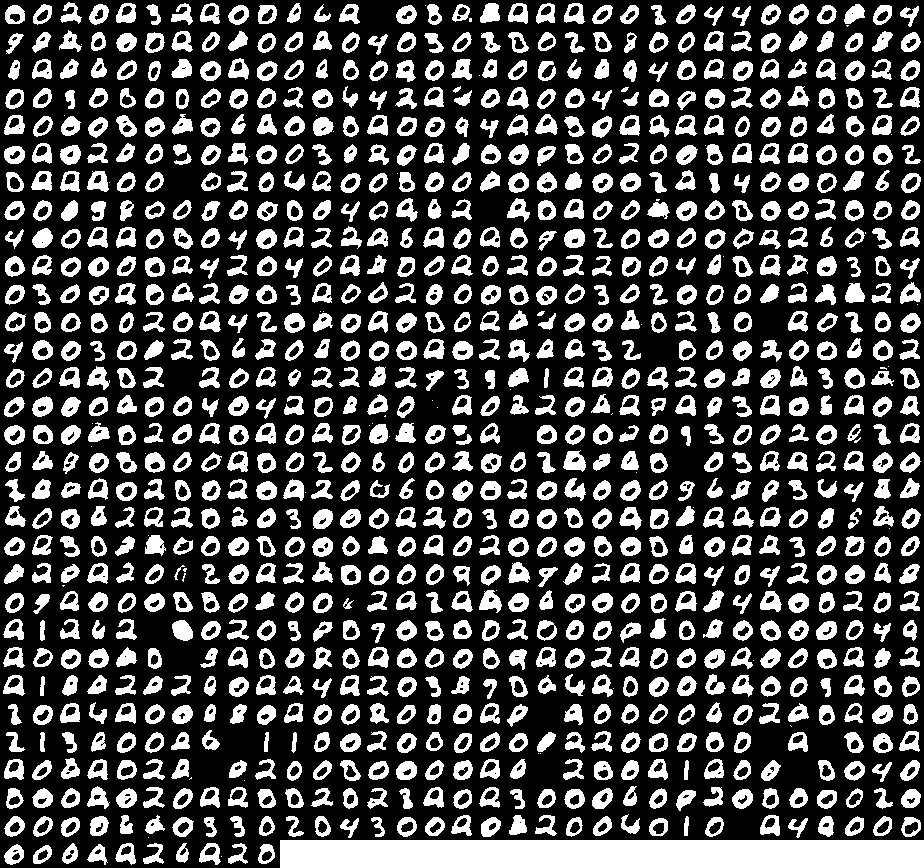

1.42143103243e-08


1.42143103243e-08


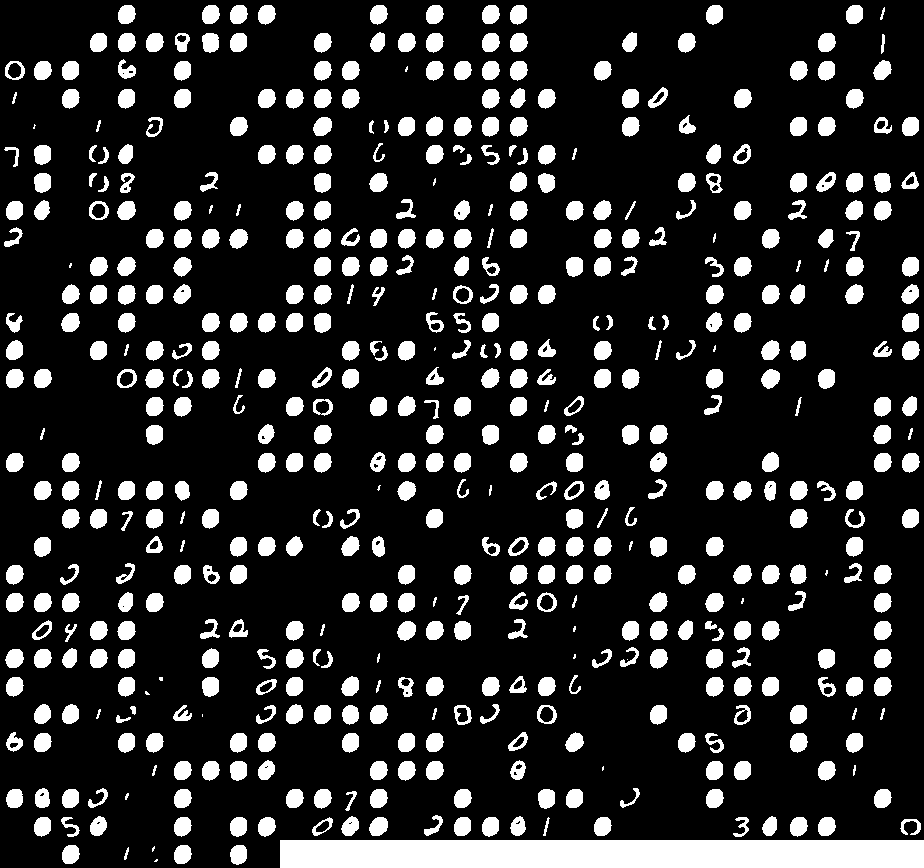

1.42143103243e-08


1.42143103243e-08


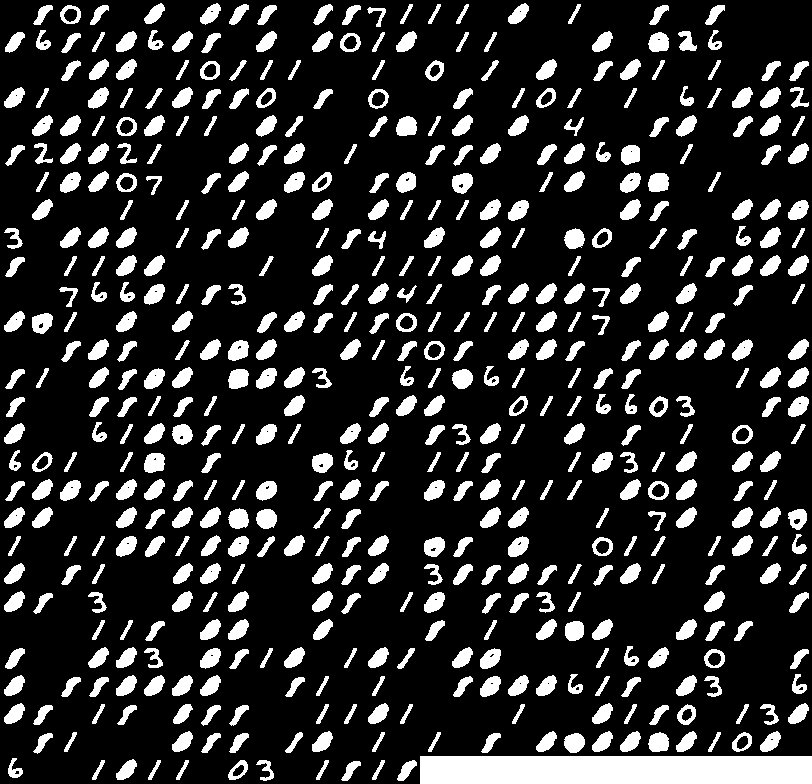

1.42143103243e-08


1.42143103243e-08


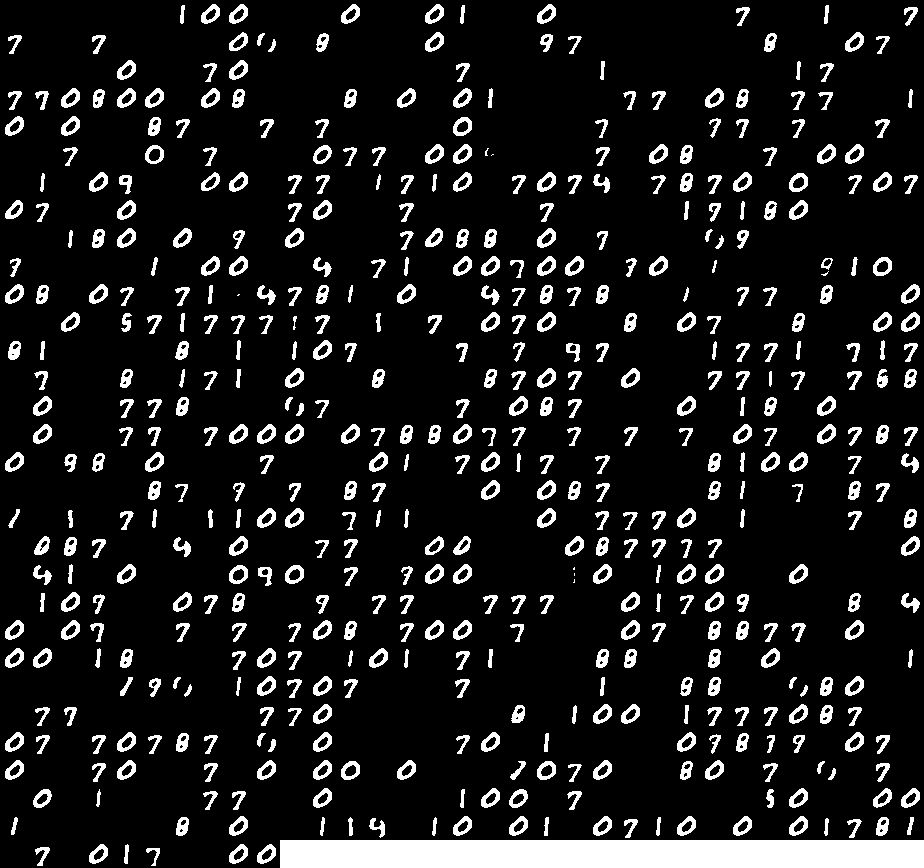

1.42143103243e-08


0.000762555318312


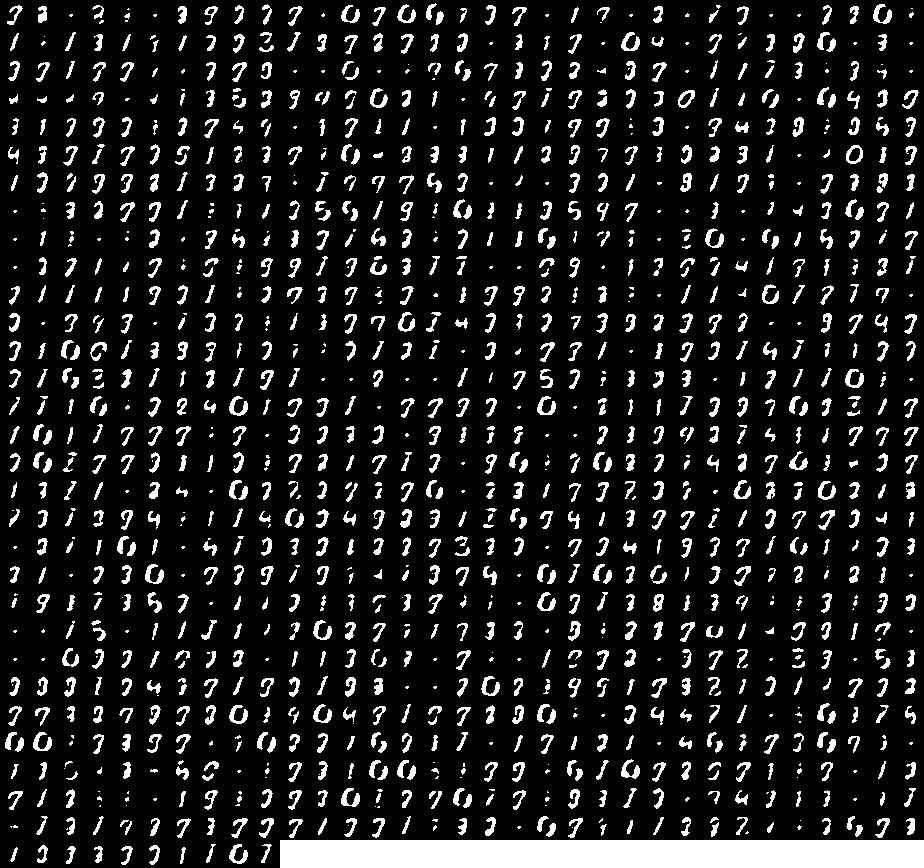

0.000990551286613


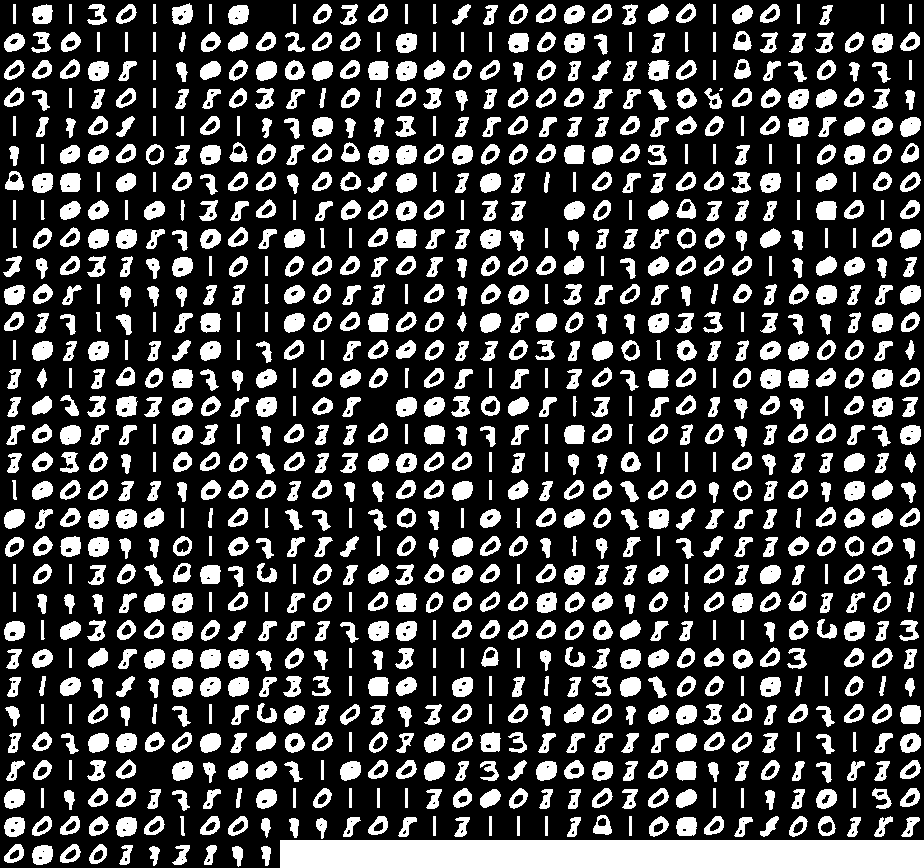

0.00122620594636


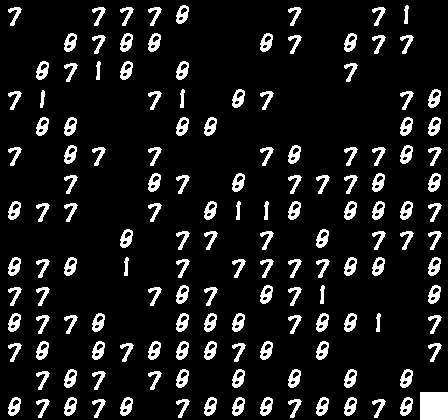

0.00129834915143


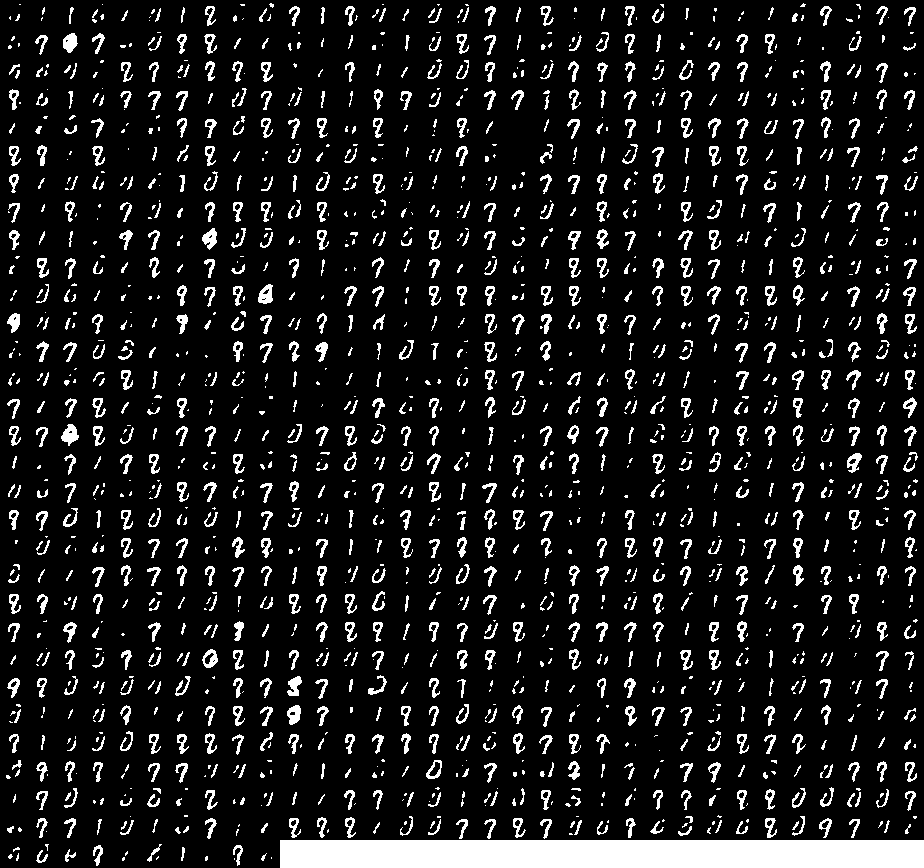

0.00193407571973


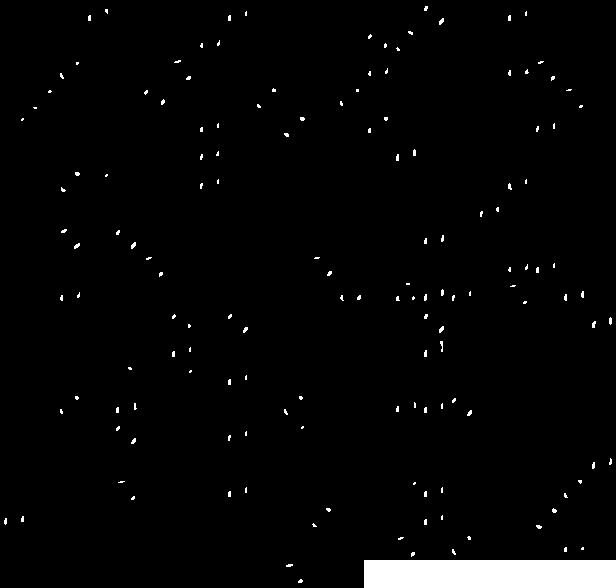

0.00544933658719


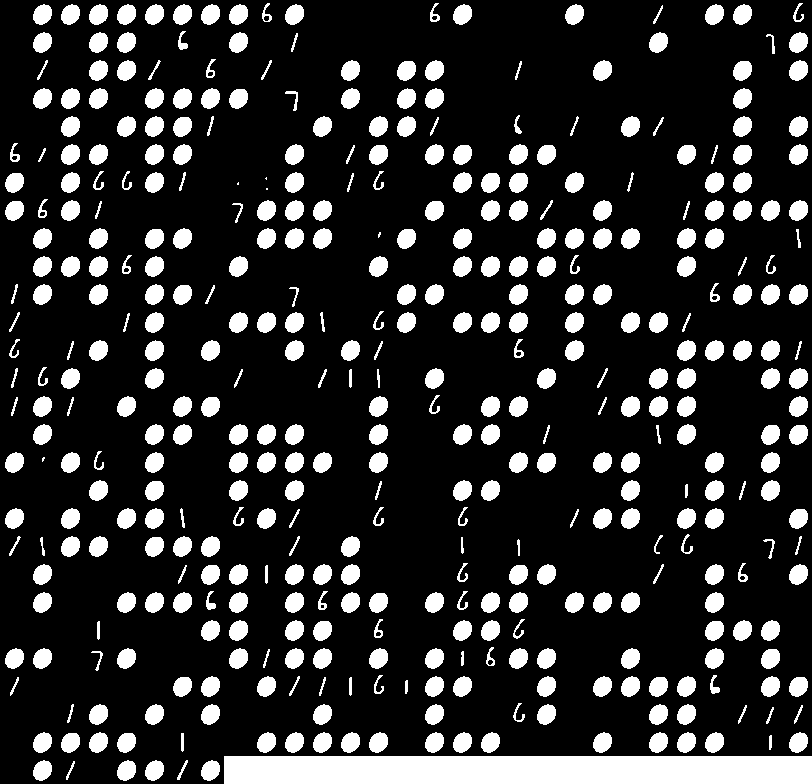

0.00574606009637


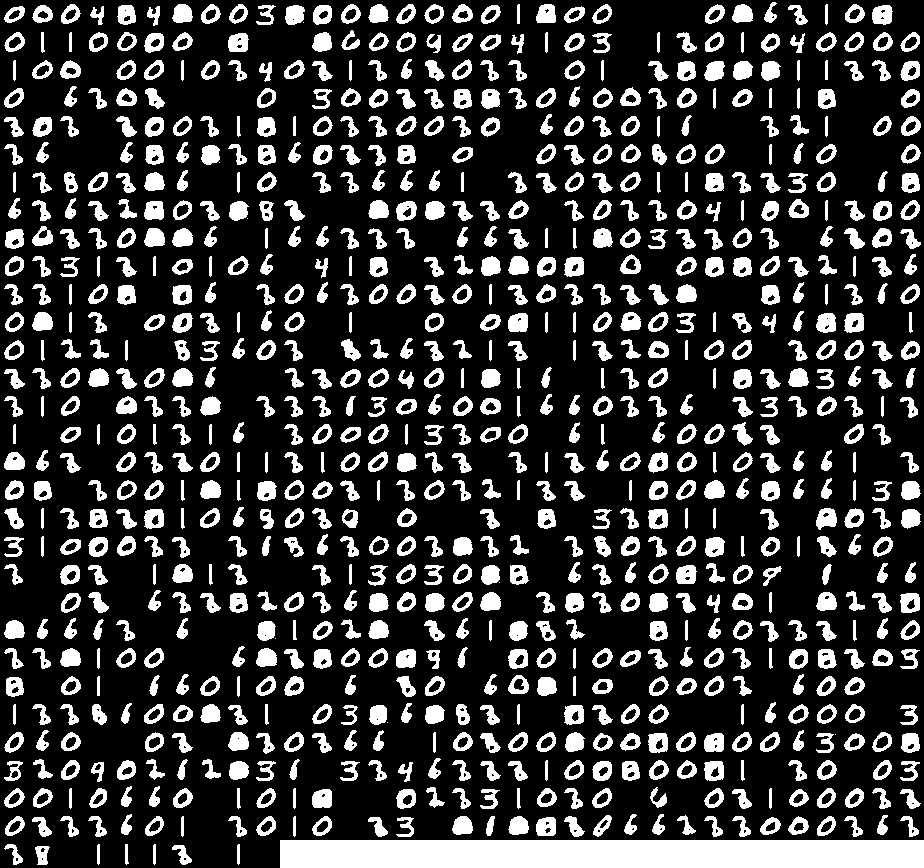

0.00635955844796


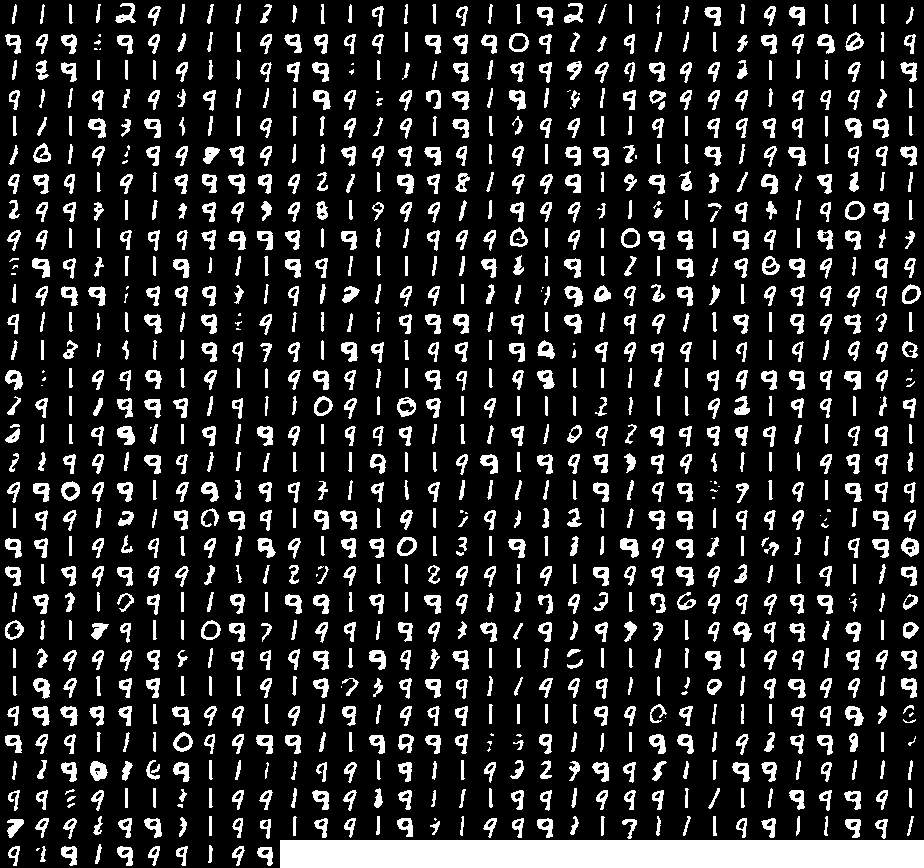

0.00715178257167


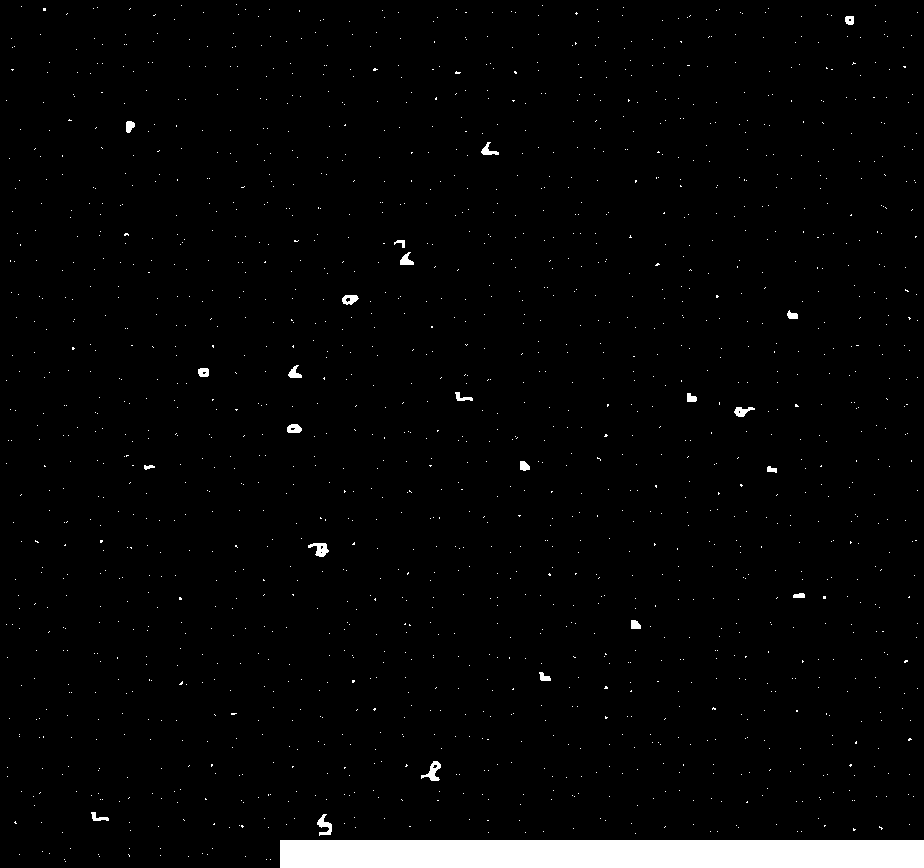

0.0072118960512


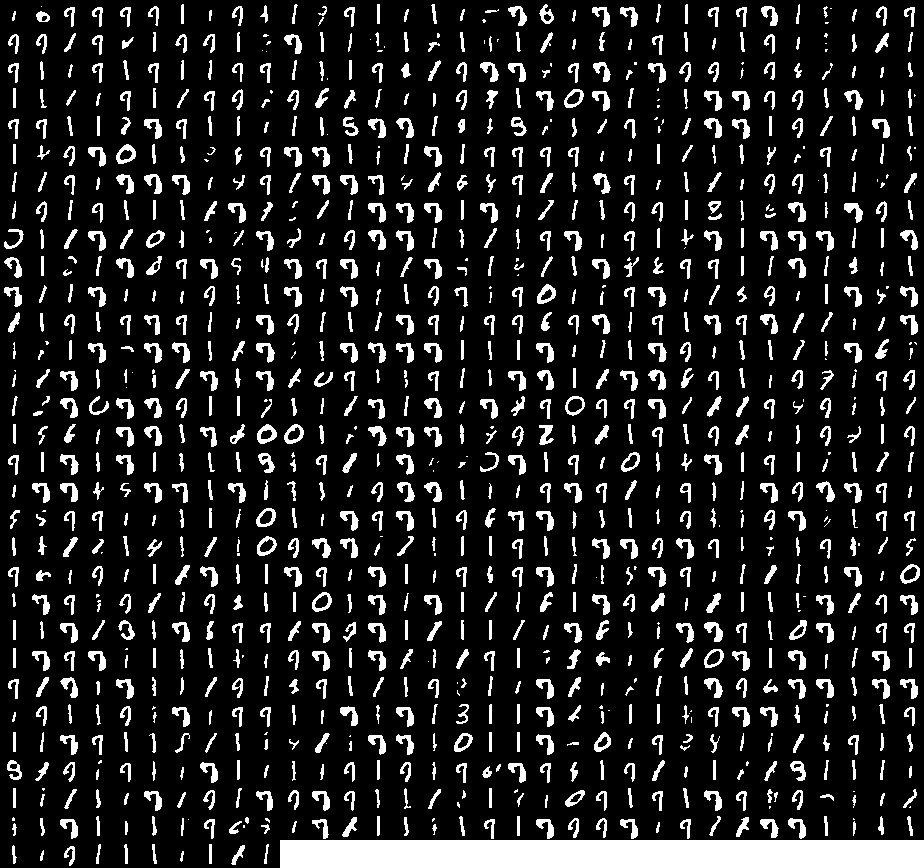

0.00727989008533


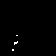

0.00826025538983


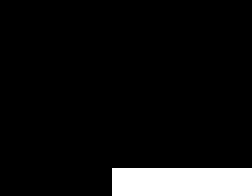

0.00898968924857


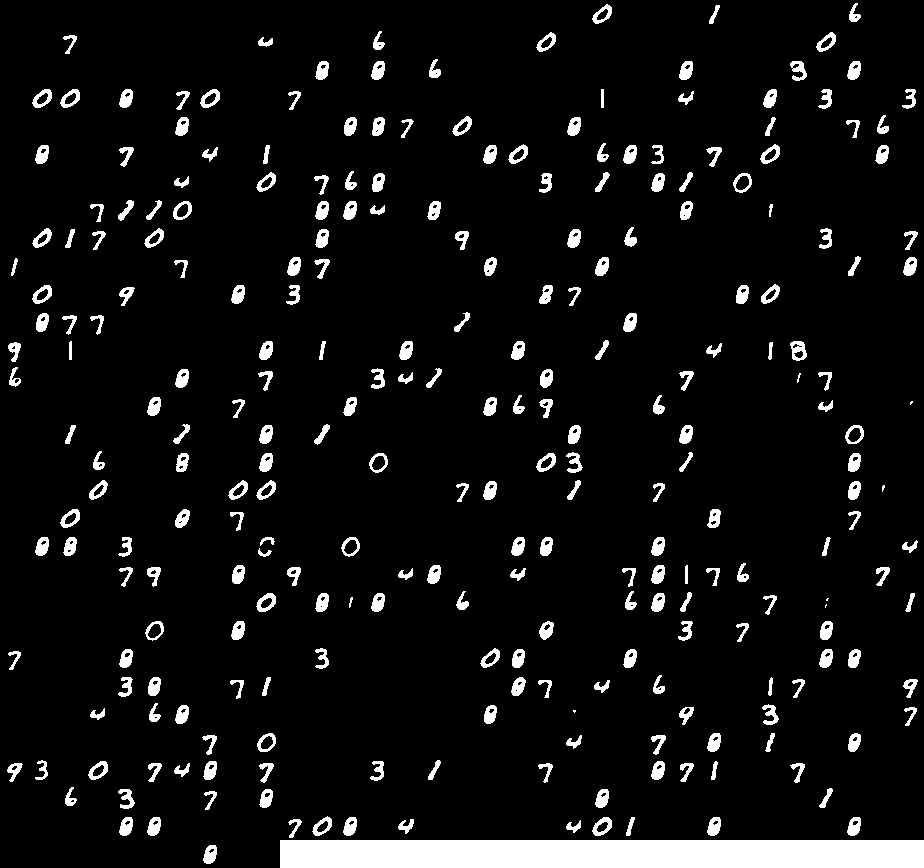

0.00975209054427


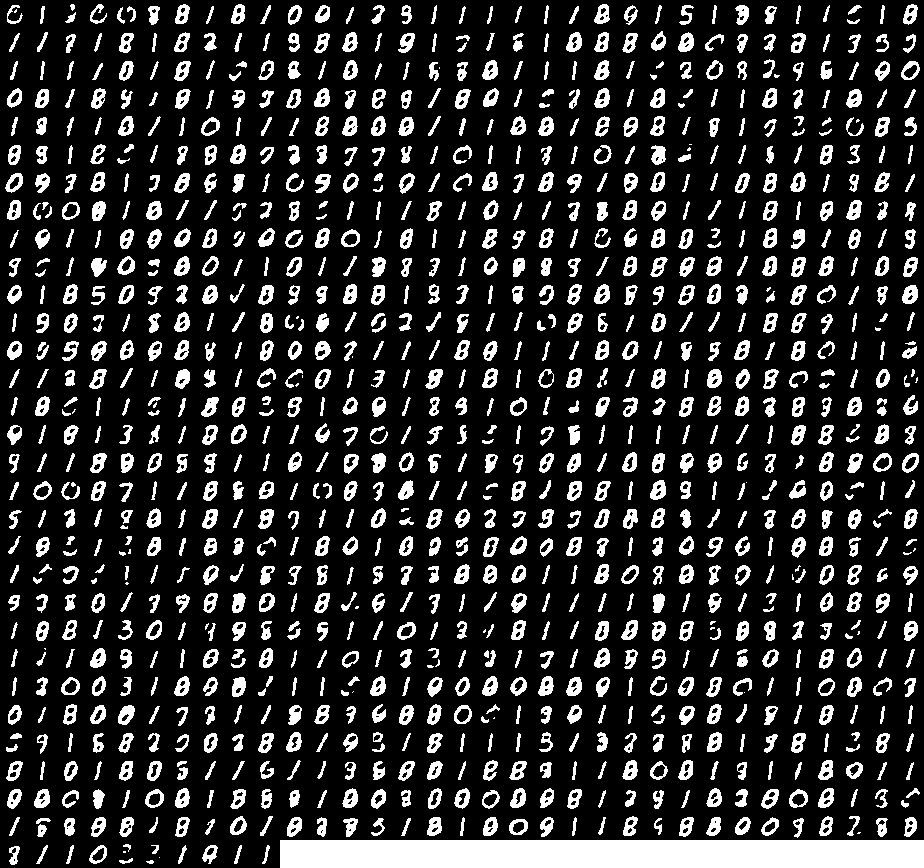

0.01015729017


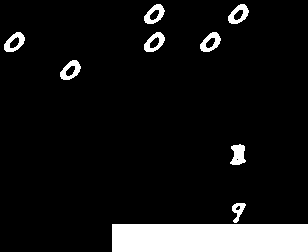

0.0115742127822


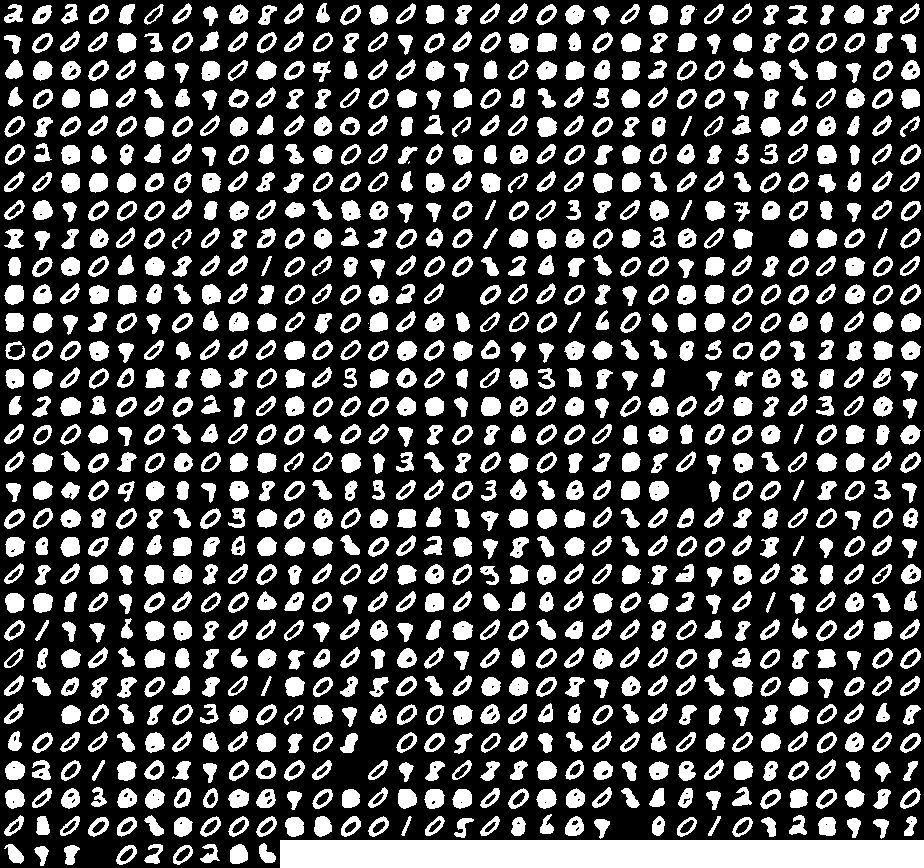

0.0139414009832


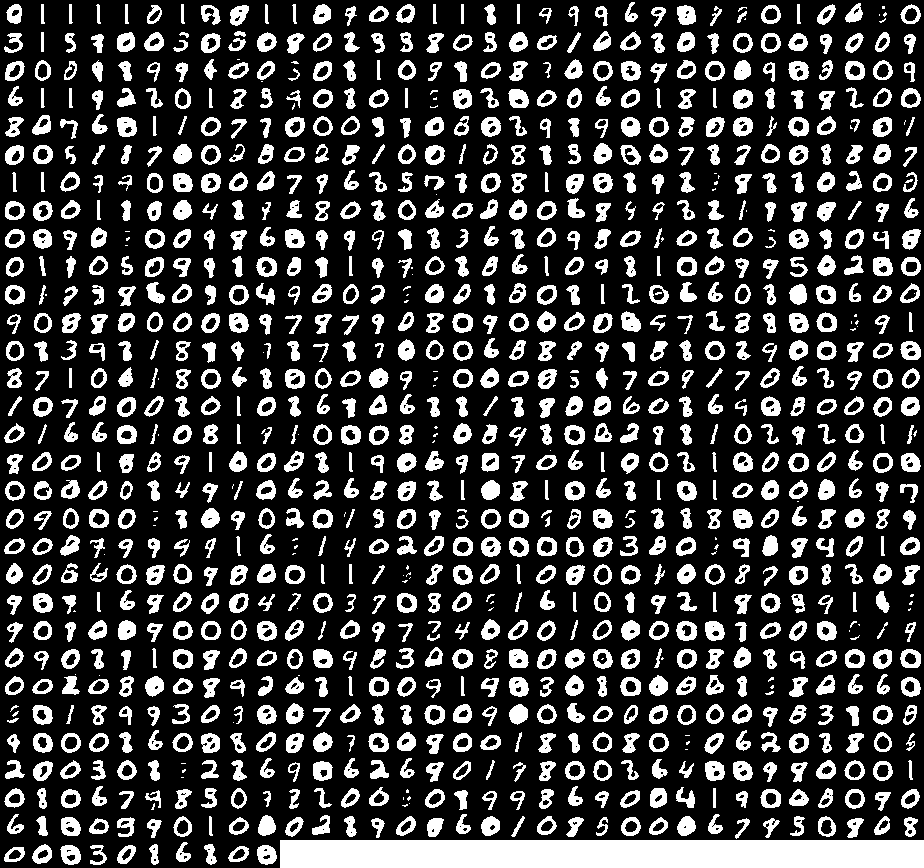

0.0145221590562


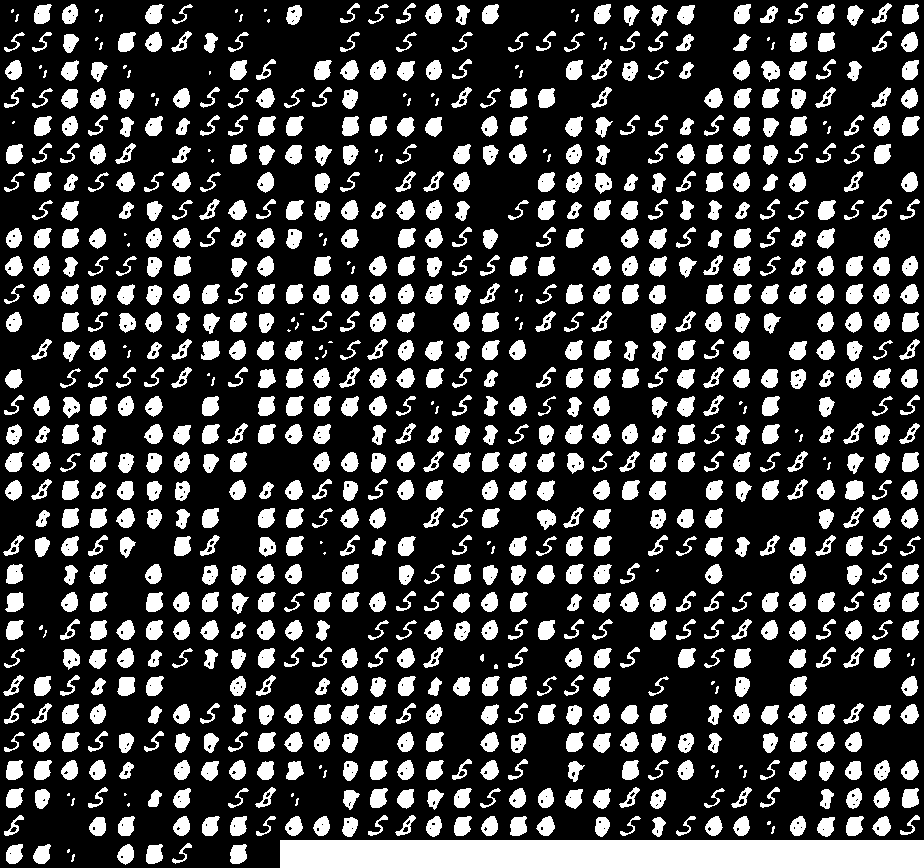

0.0155535944802


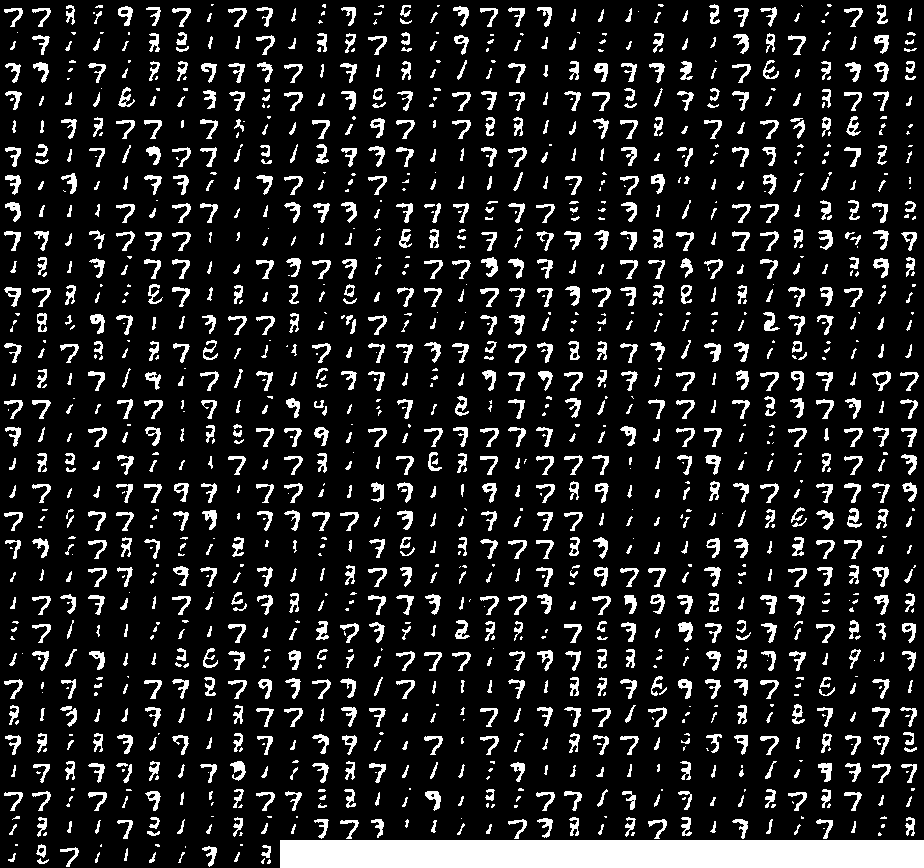

0.0171419916002


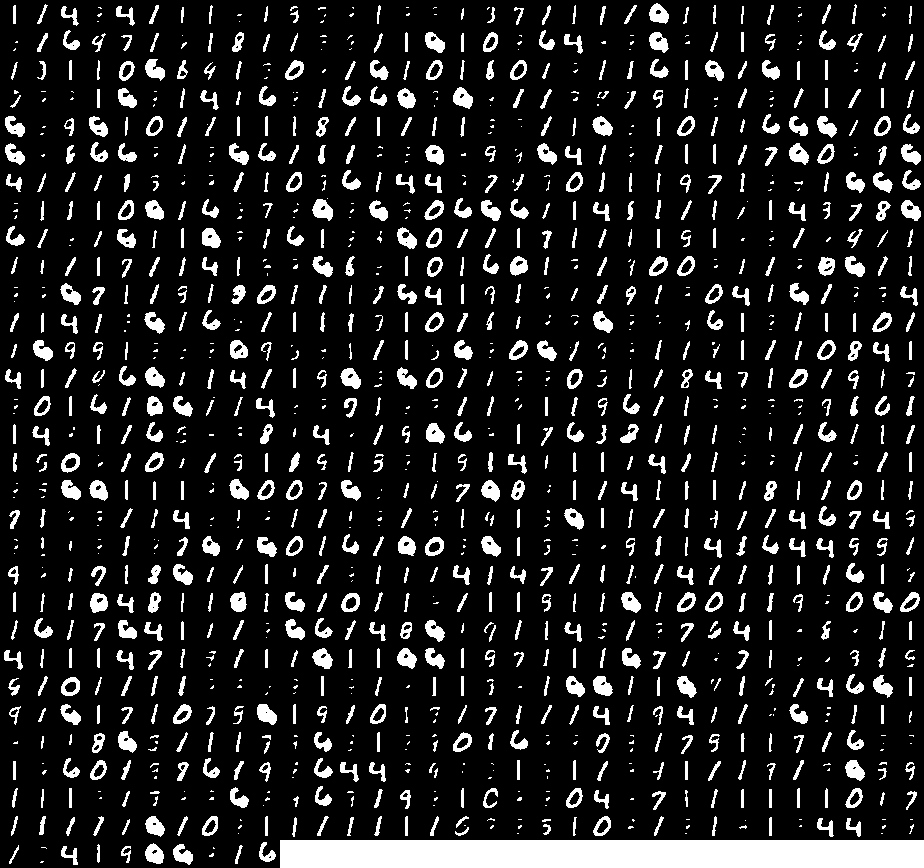

0.0172250566731


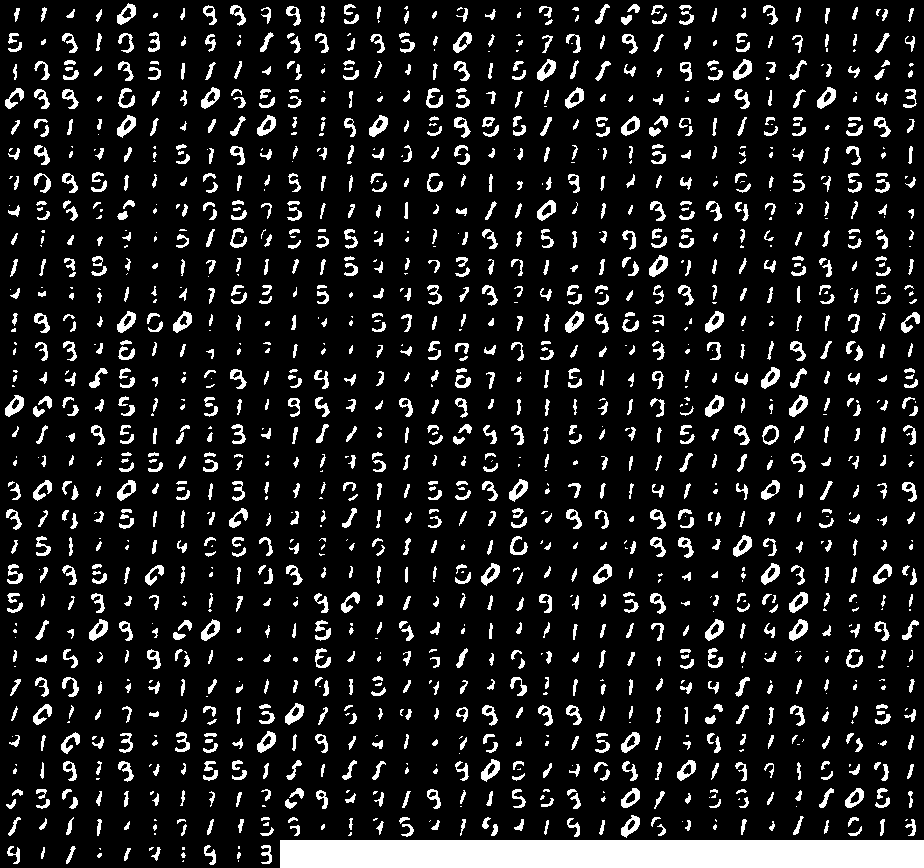

0.0186390550814


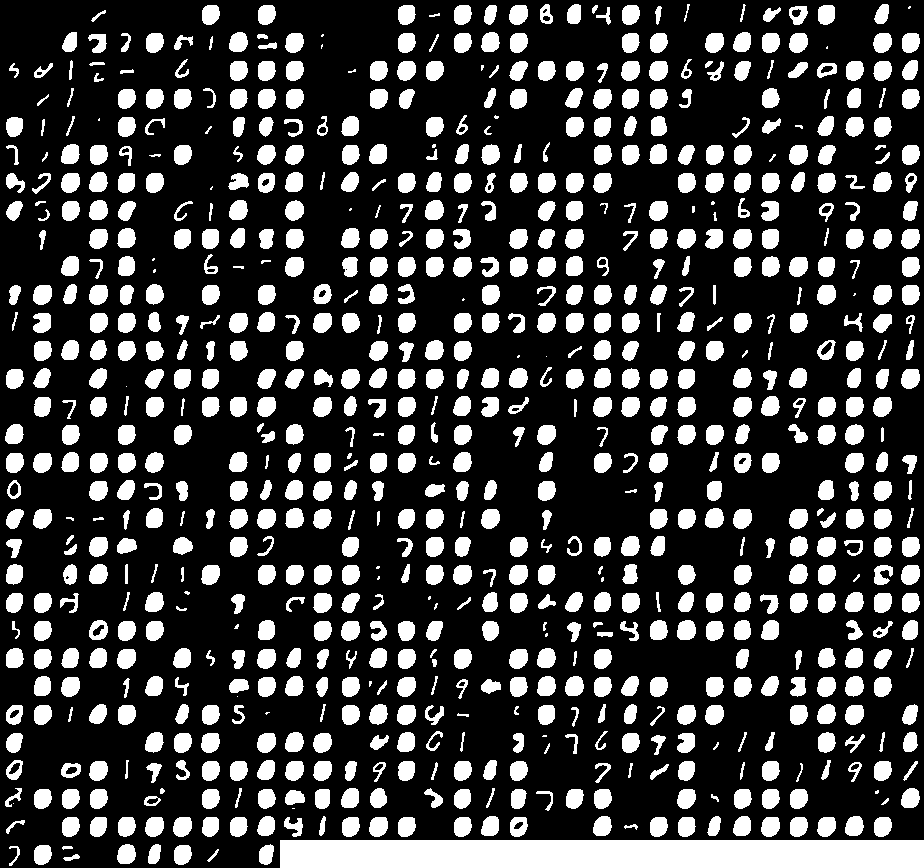

0.018936983758


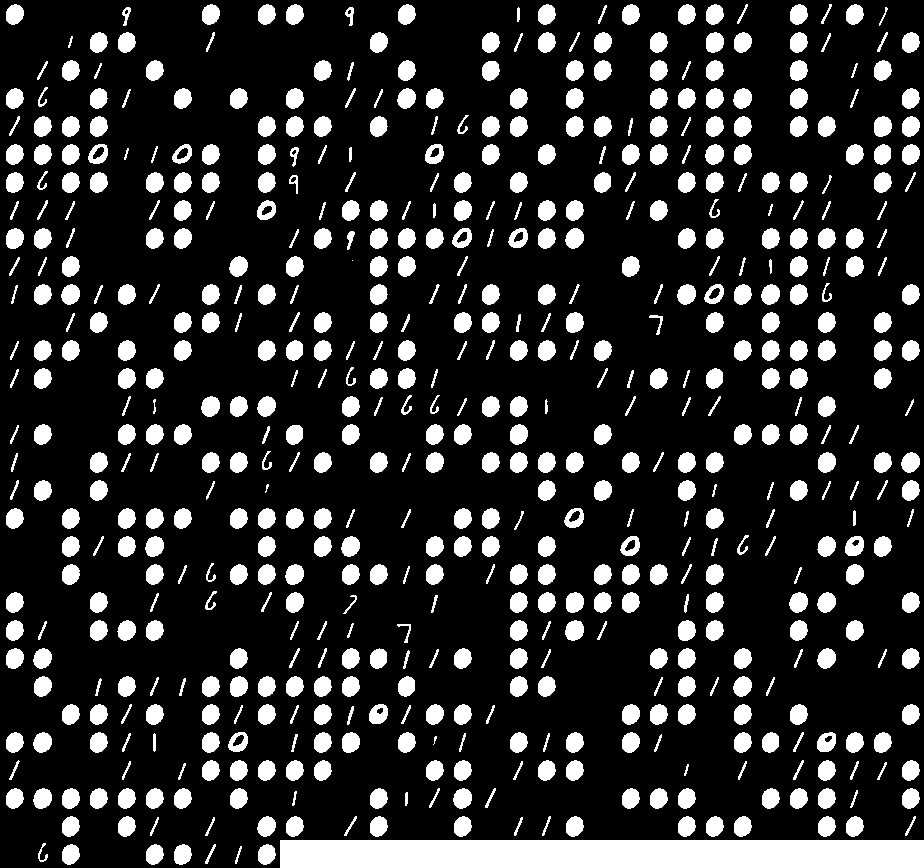

0.0191582016573


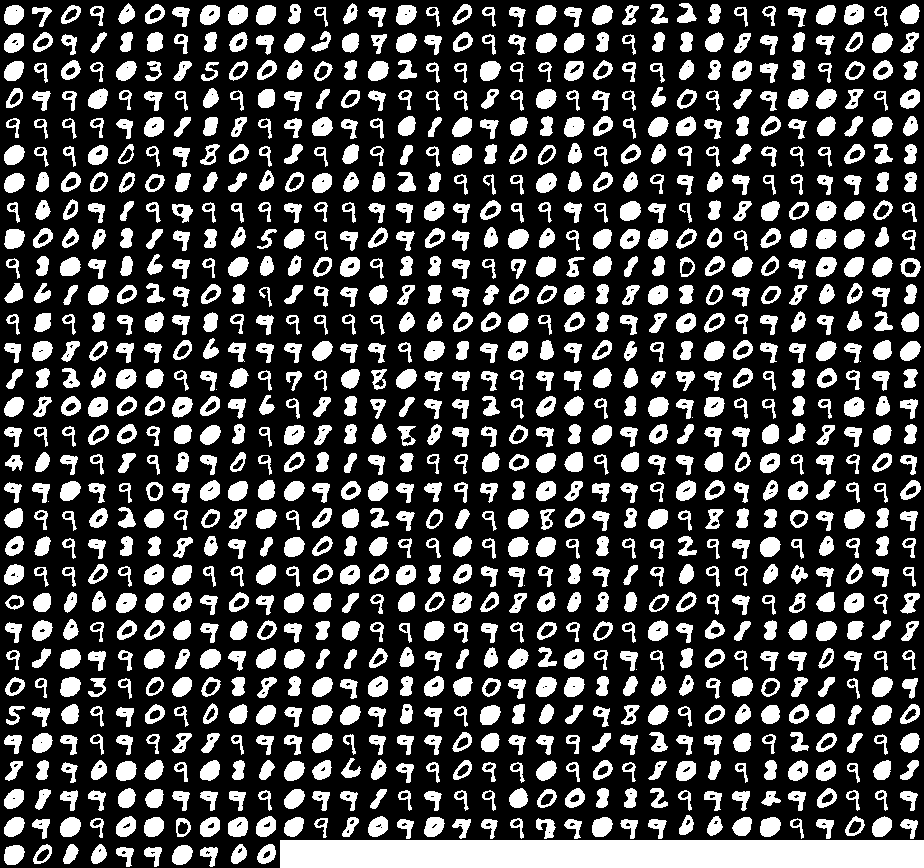

0.020033038993


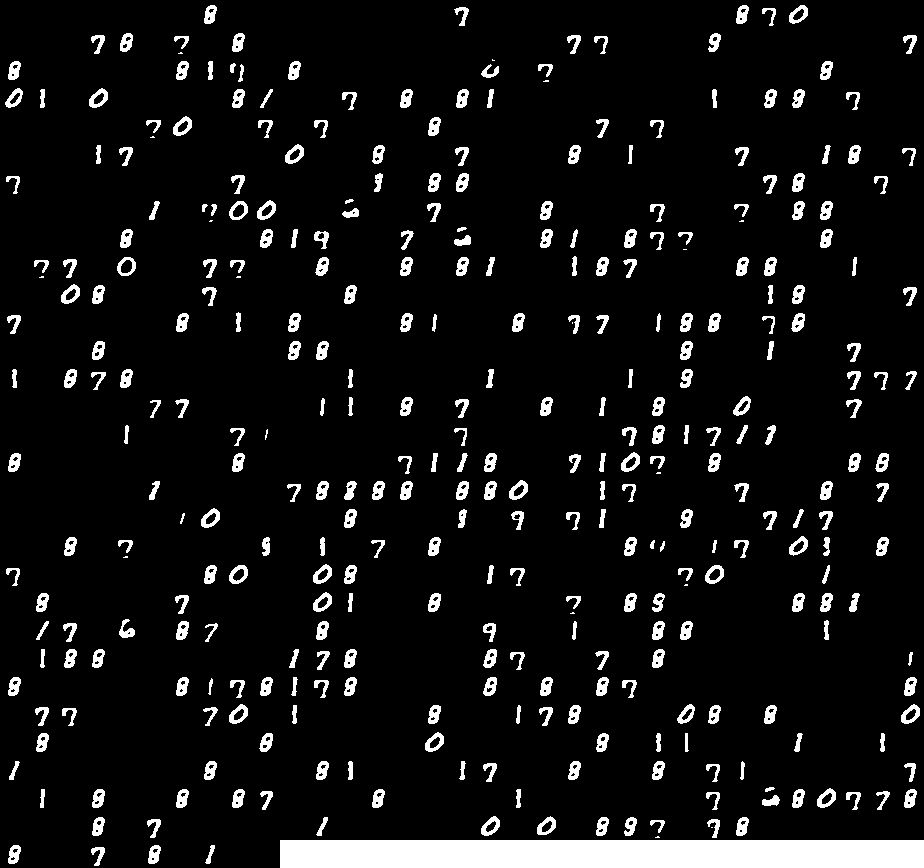

0.0205815307503


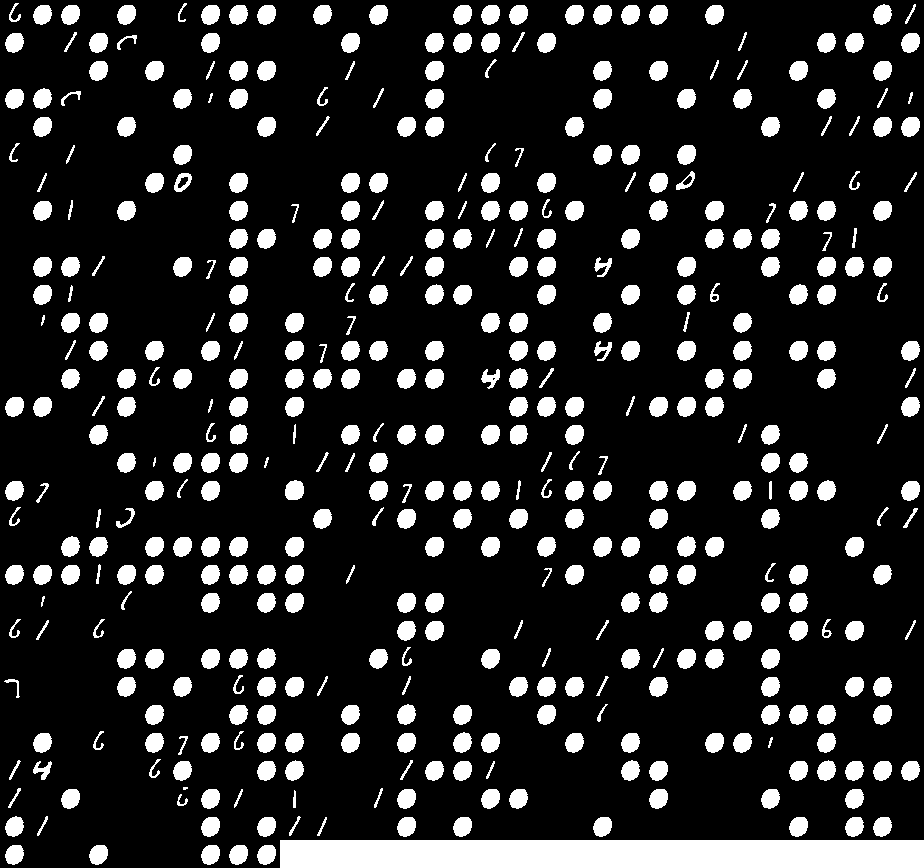

0.0208369599324


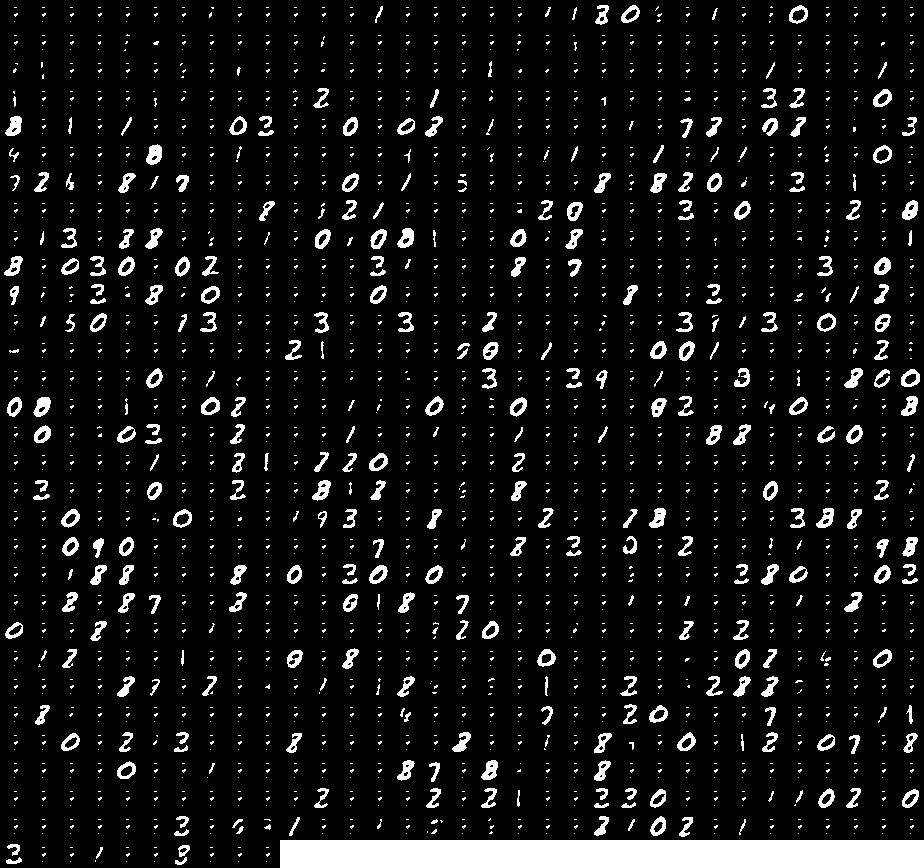

0.021015712718


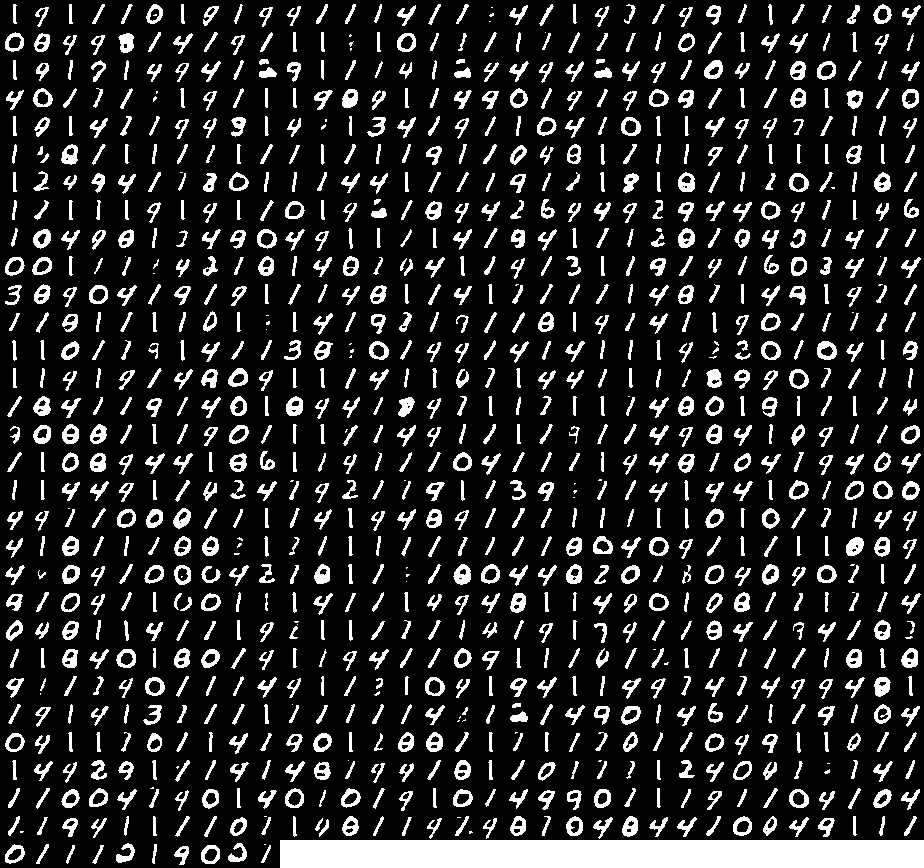

0.0210282936096


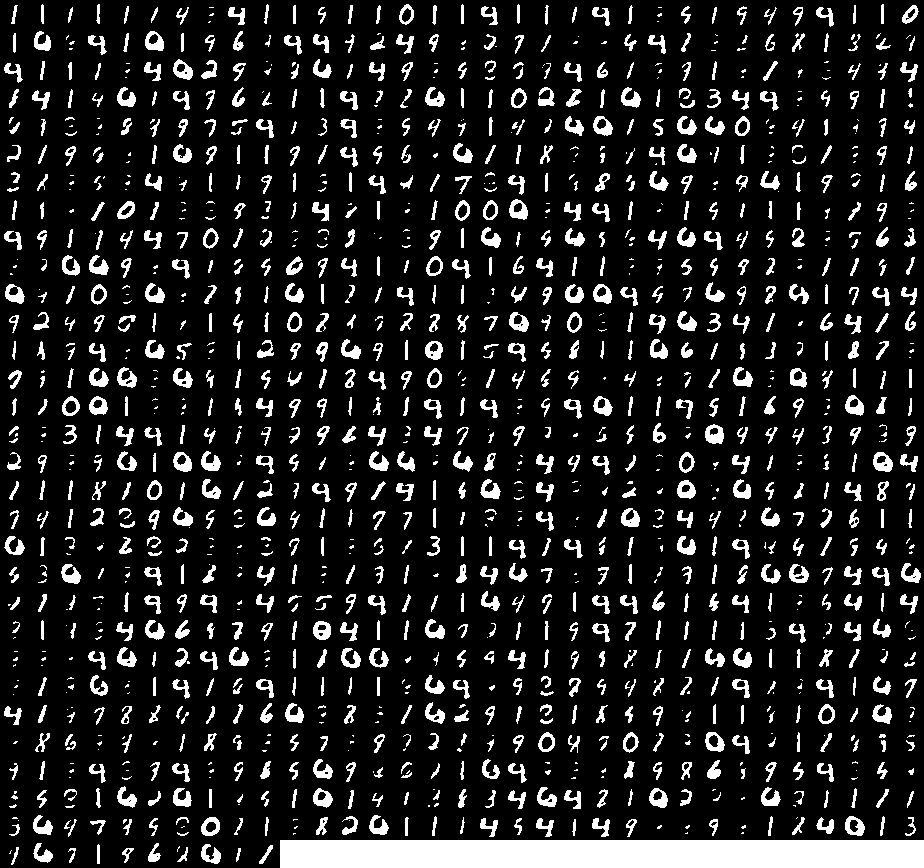

0.0215695445395


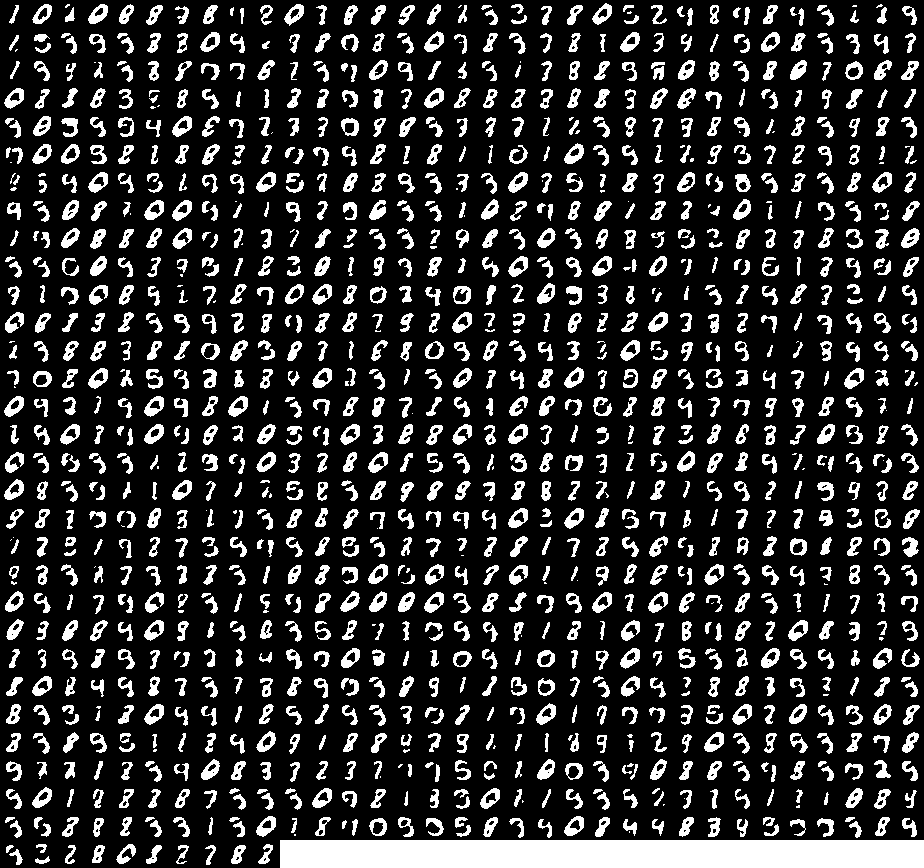

0.0228726135206


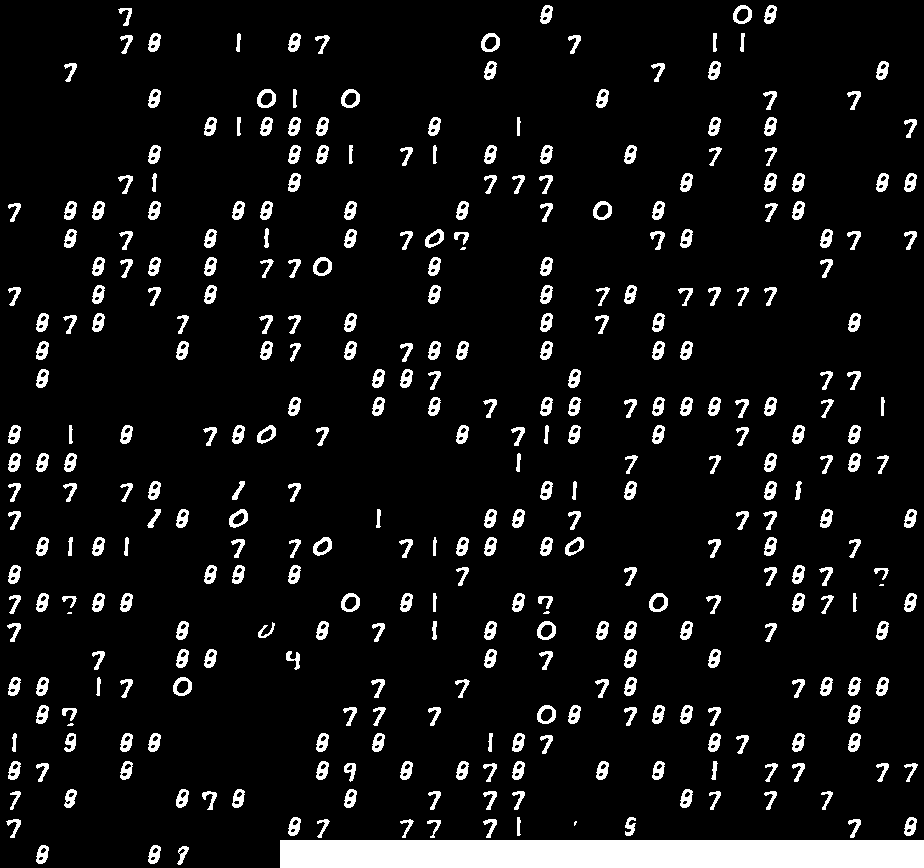

0.0232949390477


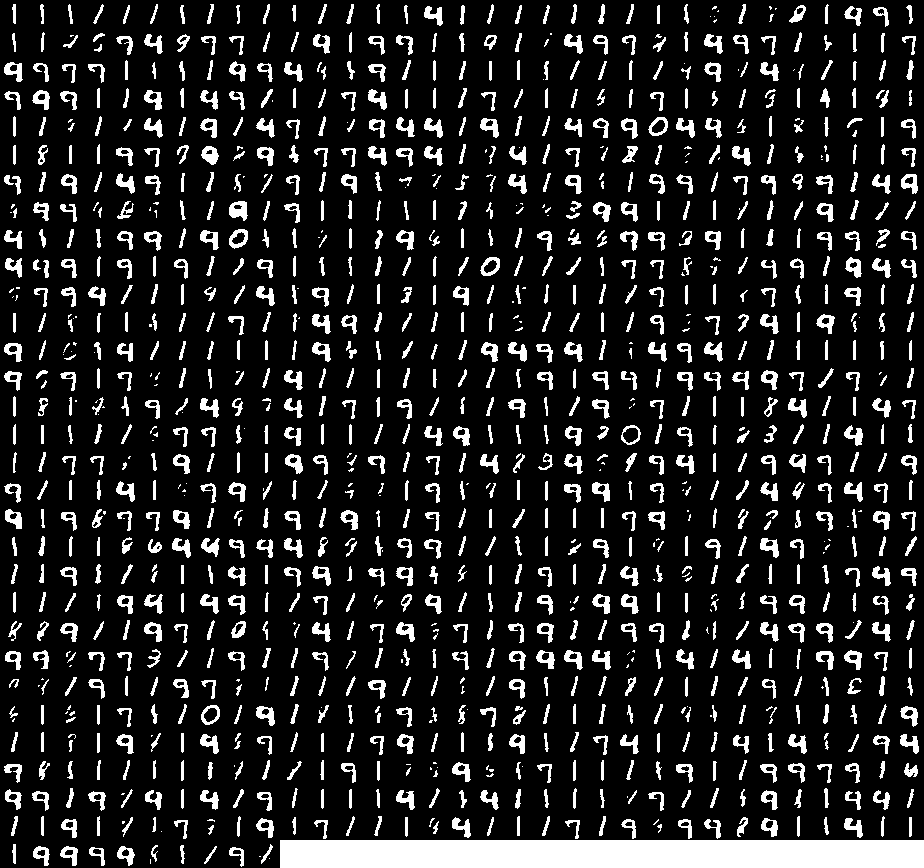

0.0233378290091


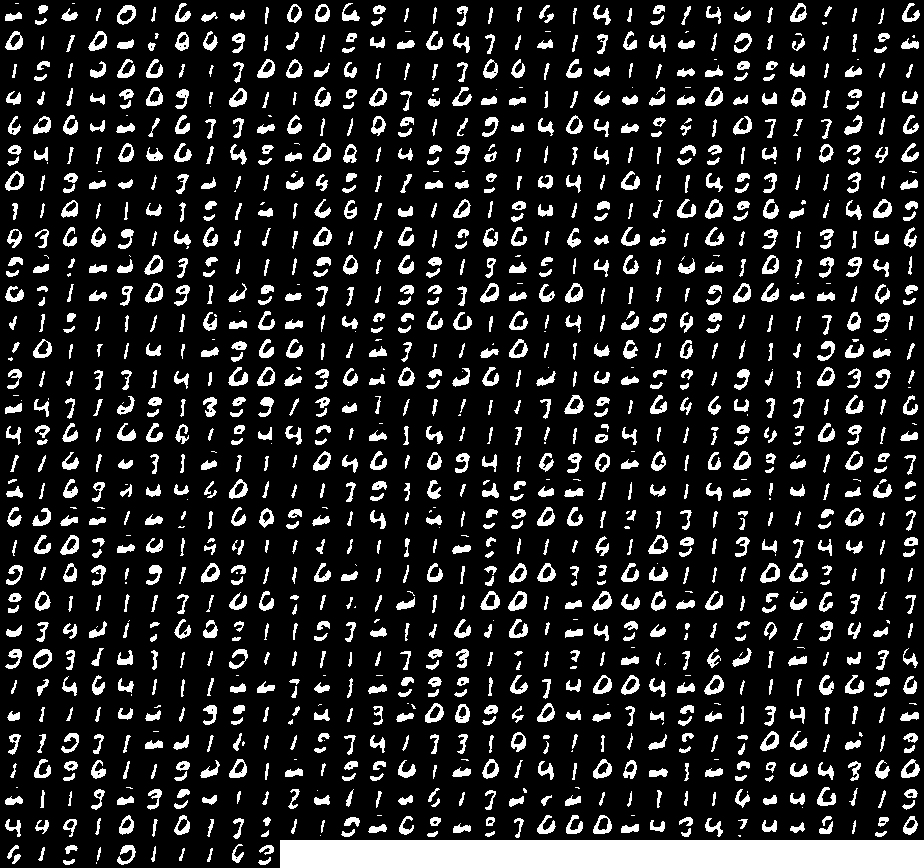

0.0237325222519


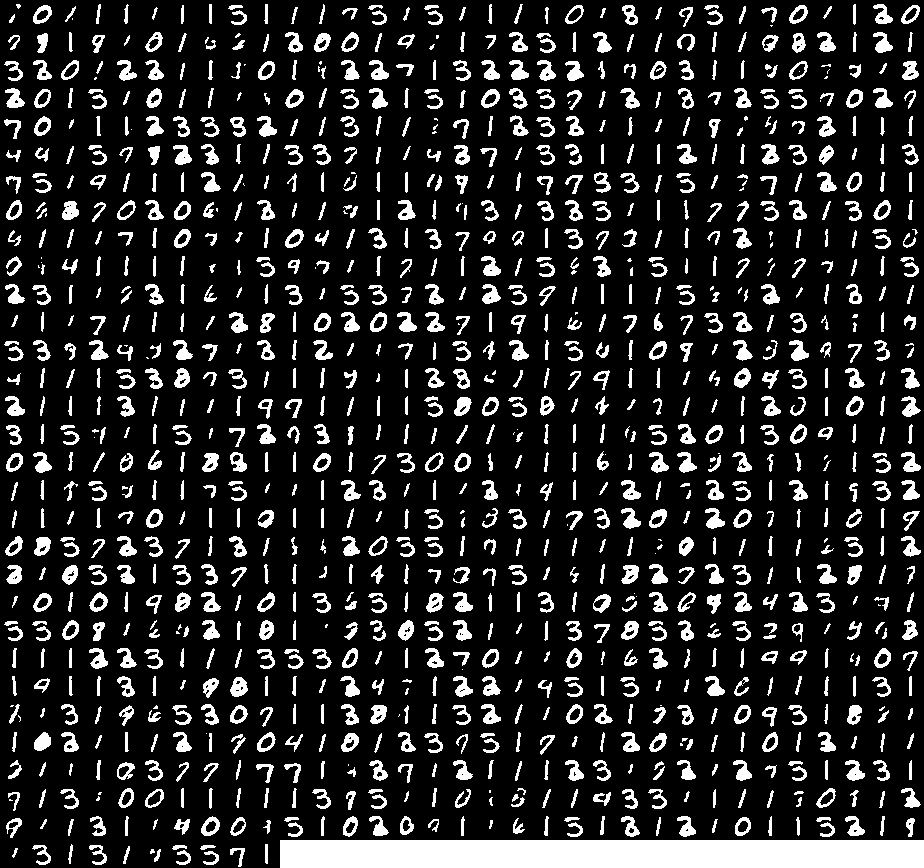

0.0240215045712


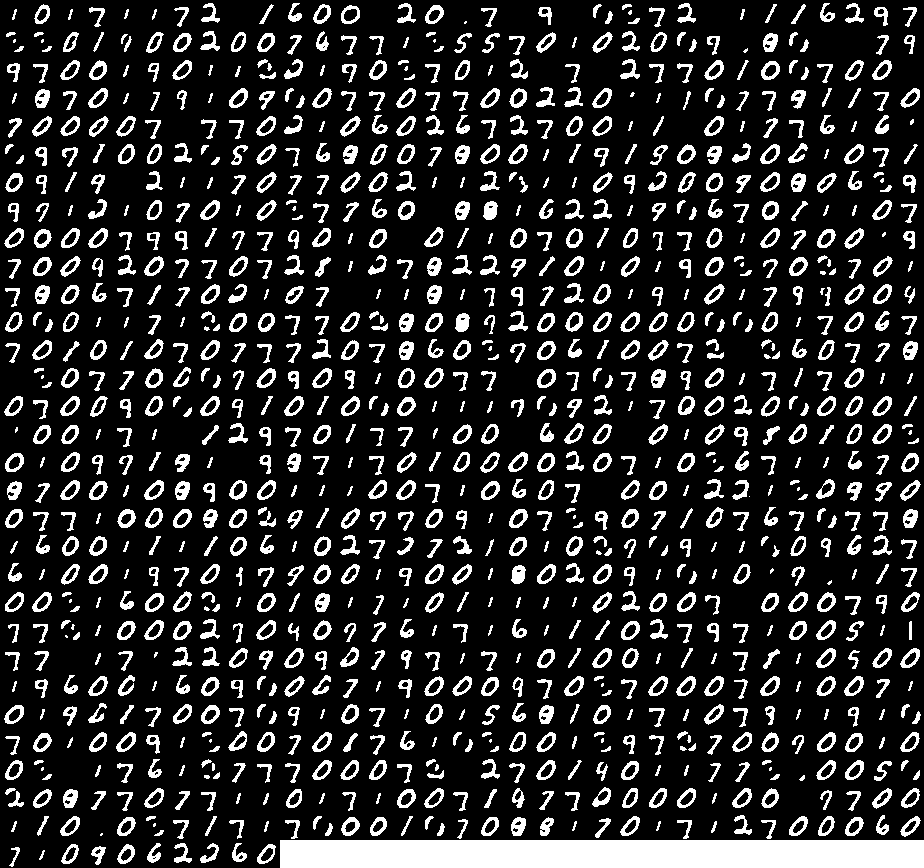

0.0242662659037


0.0242662659037


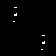

0.0242662659037


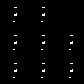

0.0242662659037


0.0250242038439


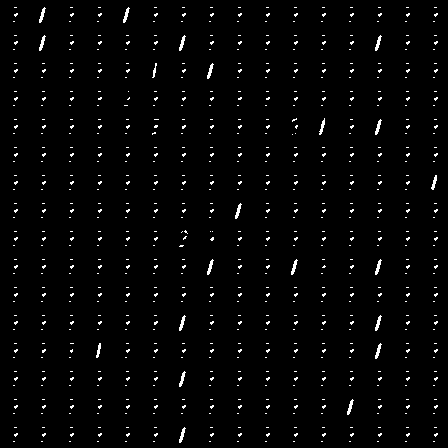

0.0251710439442


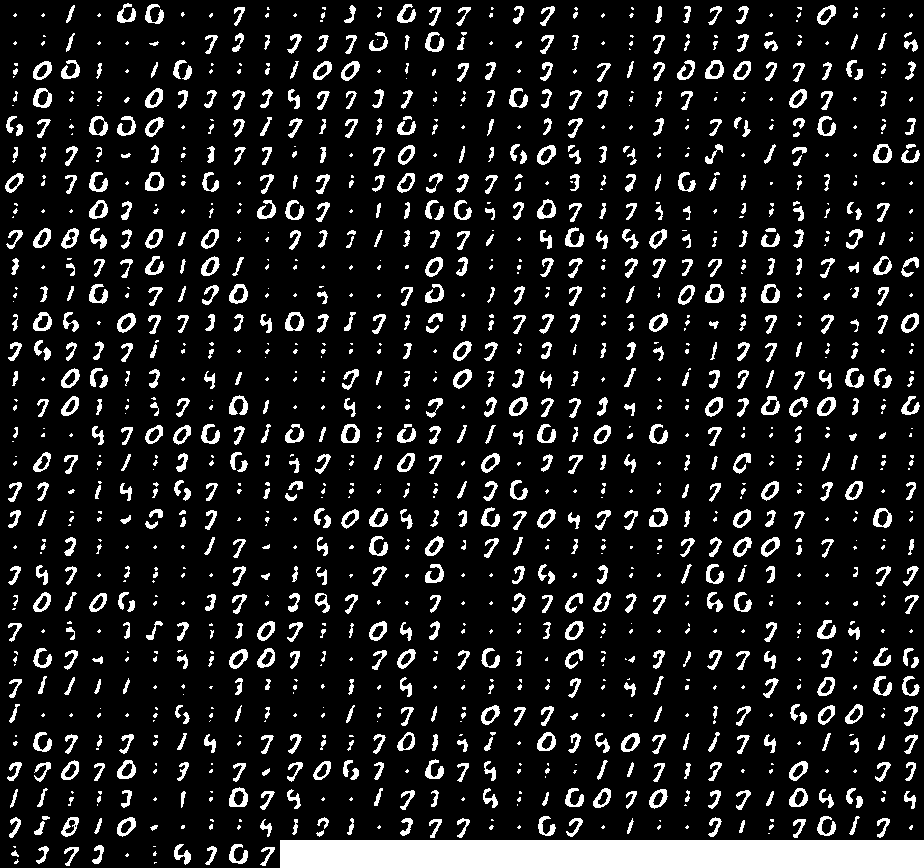

0.0266928897927


In [62]:
for image, score in zip(df['image'][0:100], df['fontness'][0:100]):
    print(score)
    img = Image(image)
    display(img)

In [40]:
baseline = 9.29135704041 / (28.*28.)

In [41]:
"""
for j in db.jobs_with(state=SUCCESS, type='generation'):
    if j['stats'] is None:
        continue
    if 'fonts_rec_error' not in j['stats']:
        continue
    stats = j['stats'].copy()
    stats['fonts_rec_error'] /= baseline
    db.job_update(j['summary'], {'stats': stats})
"""

In [43]:
"""
baseline = 9.29135704041 / (28.*28.)
for j in db.jobs_with(state=SUCCESS, type='generation'):
    if j['stats'] is None:
        continue
    if 'aa_fontness' not in j['stats']:
        continue
    stats = j['stats'].copy()
    stats['aa_fontness']['mean'] /= baseline
    stats['aa_fontness']['std'] /= baseline
    stats['aa_fontness']['min'] /= baseline
    stats['aa_fontness']['max'] /= baseline
    stats['aa_fontness']['10per'] /= baseline
    stats['aa_fontness']['90per'] /= baseline
    db.job_update(j['summary'], {'stats': stats})
"""